## Sentiment Based Product Recommendation System

    -  Done By: Tharun Tej Reddy Thodimi

## Model Deployed into Heroku Platform which can be accessed from : https://sentimnetbasedproductrecom.herokuapp.com/

## 1.Import Required Libraries

In [181]:
# Ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [182]:
# Importing Required Libraries 

import re
import sklearn
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

# xgboost library for model building
import xgboost as xgboost

# Visualisatiopn libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Stats library
import statsmodels as sm

# pickle for pickling the models built useful for deployment
import pickle

# set options for displaying max columns and rows 
pd.set_option('max_columns',500)
pd.set_option('max_rows',10000000)

In [183]:
#Nlp libraries
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
ps=PorterStemmer()
lm=WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('stopwords')

# Initialise Countvectoriser and Tf-IDF(TermFrequency -Inverse Document Frequency)
cv=CountVectorizer()
tf=TfidfVectorizer(max_features=5000,ngram_range=(1,3))

[nltk_data] Downloading package wordnet to C:\Users\krishna
[nltk_data]     reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\krishna
[nltk_data]     reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Read the Sampe30 data from csv

In [184]:
# Import the data into data variable using pandas 
data=pd.read_csv('sample30.csv')
data.head(3)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive


## Data Description

### Lest see the outline of data to get the insights of the data we are going to deal with in this casestudy

In [185]:
# shape of the data
data.shape

(30000, 15)

## Inisghts:
- We have 30000 Rows and 15 columns of data

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

## Insights:
- We could observe  Null values in the columns like `manufacturer`, `reviews_date`,`reviews_didpurchase`,`reviews_dorecommend`,`reviews_title`,`reviews_usercity`,`reviews_province`,`reviews_username` and `user_sentiment`
- Lets treat these null values in our further analysis

In [187]:
data.describe()

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## Inisghts:
- In data desription we could only see the reviews_rating since we have only these category marked as numeric in our datset.

## 3. Inspecting Missing values

In [188]:
# Count of Null value check on each column/Feature
data.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

## Insights:
- We could observe  Null values in the columns like `manufacturer`, `reviews_date`,`reviews_didpurchase`,`reviews_dorecommend`,`reviews_title`,`reviews_usercity`,`reviews_province`,`reviews_username` and `user_sentiment`
- Lets check the percentage of null values in next steps and take action to treat nul values in the data.

In [189]:
# Percentage of null values
PercentageofNullvalues=((data.isnull().sum()/data.shape[0])*100).round(2)
PercentageofNullvalues

id                       0.00
brand                    0.00
categories               0.00
manufacturer             0.47
name                     0.00
reviews_date             0.15
reviews_didPurchase     46.89
reviews_doRecommend      8.57
reviews_rating           0.00
reviews_text             0.00
reviews_title            0.63
reviews_userCity        93.57
reviews_userProvince    99.43
reviews_username         0.21
user_sentiment           0.00
dtype: float64

## Insights:
- We have three features where null vlaue percent is more than 40 percent lets drop them and treat the remaining features with Null value Imputation techniques


## 4. Handling Missing values

In [190]:
# Drop the features which have more than 40 percent null values in it
data.drop(['reviews_didPurchase','reviews_userCity','reviews_userProvince'],axis=1,inplace=True)

## Insights:
- We have dropped following columns `reviews_didpurchase`,`reviews_usercity` and `reviews_userProvince` in the previous step, Since null vlaue percentage in their respective columns is more than 40%

In [191]:
# Percentage of null values
PercentageofNullvalues=((data.isnull().sum()/data.shape[0])*100).round(2)
PercentageofNullvalues

id                     0.00
brand                  0.00
categories             0.00
manufacturer           0.47
name                   0.00
reviews_date           0.15
reviews_doRecommend    8.57
reviews_rating         0.00
reviews_text           0.00
reviews_title          0.63
reviews_username       0.21
user_sentiment         0.00
dtype: float64

## Insights:
- Except one column all the columns wherever null vlaues are present, percentage of null vaues is less than 1 percentage.
- Lets treat all the null values before procedding for further analysis

In [192]:
# Shape of the data
data.shape

(30000, 12)

## Insights:
- We have 12 columns now since we have dropped 3 columns from our dataset since it contained more than 40 percent of null values in it, imutation of those features may lead to misleading our further anlaysis of model building. SO we have dropped the columns

## Replace nan values

In [193]:
## Categorical null values are replaced with maximum occuring values over that column/feature

data['reviews_username'].replace(np.NaN,data['reviews_username'].value_counts().index[0],inplace=True)
data['manufacturer'].replace(np.NaN,data['manufacturer'].value_counts().index[0],inplace=True)
data['reviews_date'].replace(np.NaN,data['reviews_date'].value_counts().index[0],inplace=True)
data['reviews_title'].replace(np.NaN,data['reviews_title'].value_counts().index[0],inplace=True)

## Insights:
- We have treated null values in the following features : `reviews_username`,`manufacturer`,`reiews_date` and `reviews_title`.
- Since all the columns we have treated are categorical columns, we have replaced null values with majority category value appearing in the feature.

In [194]:
# Verify the dataframe
data.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,NaN,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,NaN,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative


## Inisghts:
- Treatment of null values looks good and we are yet to perform null value treatment for the feature called `reviews_doRecommend`

### Treating `reviews_doRecommend` column

In [195]:
data['reviews_doRecommend'].value_counts()

True     25880
False     1550
Name: reviews_doRecommend, dtype: int64

## Insights:
- We have observed that category `True` has appeared most of the times in the feature: `reviews_doRecommend`,Lets replace null values with majority category in further steps

In [196]:
data['reviews_doRecommend'].replace(np.NaN,data['reviews_doRecommend'].value_counts().index[0],inplace=True)

In [197]:
PercentageofNullvalues=((data.isnull().sum()/data.shape[0])*100).round(2)
PercentageofNullvalues

id                     0.0
brand                  0.0
categories             0.0
manufacturer           0.0
name                   0.0
reviews_date           0.0
reviews_doRecommend    0.0
reviews_rating         0.0
reviews_text           0.0
reviews_title          0.0
reviews_username       0.0
user_sentiment         0.0
dtype: float64

## Inisghts:
- We have treated majority of the features where null values are present,Lets verify one more time in further step

In [198]:
# Null value check on each feature
PercentageofNullvalues=data.isnull().sum()/data.shape[0]
PercentageofNullvalues

id                     0.000000
brand                  0.000000
categories             0.000000
manufacturer           0.000000
name                   0.000000
reviews_date           0.000000
reviews_doRecommend    0.000000
reviews_rating         0.000000
reviews_text           0.000000
reviews_title          0.000000
reviews_username       0.000000
user_sentiment         0.000033
dtype: float64

## Insights:
- We noticed that we still have null values in `user_sentiment` feature, Lets verify the null value

In [199]:
data.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   30000 non-null  object
 1   brand                30000 non-null  object
 2   categories           30000 non-null  object
 3   manufacturer         30000 non-null  object
 4   name                 30000 non-null  object
 5   reviews_date         30000 non-null  object
 6   reviews_doRecommend  30000 non-null  bool  
 7   reviews_rating       30000 non-null  int64 
 8   reviews_text         30000 non-null  object
 9   reviews_title        30000 non-null  object
 10  reviews_username     30000 non-null  object
 11  user_sentiment       29999 non-null  object
dtypes: bool(1), int64(1), object(10)
memory usage: 2.5+ MB


## Insights:
- We have observed in one of the row we have null value in `user_sentiment` feature.
- Lets verify the row where we have null value and drop them if not necessary

In [201]:
data[data['user_sentiment'].isnull()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,True,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,7.87E+11,NaN


In [202]:
# Drop the null values present 
# axis=0 indicates rows of the data
data.dropna(how='any',axis=0,inplace=True)
data.reset_index(drop=True,inplace=True)

## Insights:
- We have dropped the row where we had null values in `user_sentiment` feature

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29999 non-null  object
 1   brand                29999 non-null  object
 2   categories           29999 non-null  object
 3   manufacturer         29999 non-null  object
 4   name                 29999 non-null  object
 5   reviews_date         29999 non-null  object
 6   reviews_doRecommend  29999 non-null  bool  
 7   reviews_rating       29999 non-null  int64 
 8   reviews_text         29999 non-null  object
 9   reviews_title        29999 non-null  object
 10  reviews_username     29999 non-null  object
 11  user_sentiment       29999 non-null  object
dtypes: bool(1), int64(1), object(10)
memory usage: 2.5+ MB


## Inisghts:
- Now our data is free from null values, We can proceed with further data cleaning process for NLP Sentiment analysis

## 5 Datatype Validation

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29999 non-null  object
 1   brand                29999 non-null  object
 2   categories           29999 non-null  object
 3   manufacturer         29999 non-null  object
 4   name                 29999 non-null  object
 5   reviews_date         29999 non-null  object
 6   reviews_doRecommend  29999 non-null  bool  
 7   reviews_rating       29999 non-null  int64 
 8   reviews_text         29999 non-null  object
 9   reviews_title        29999 non-null  object
 10  reviews_username     29999 non-null  object
 11  user_sentiment       29999 non-null  object
dtypes: bool(1), int64(1), object(10)
memory usage: 2.5+ MB


## Insights:
- `bool` Datatype column: `reviews_doRecommend`
- `int64` Datatype column : `reviews_rating`
- `object` Datatype column: `id`,`brand`,`categories`,`manufacturer`, `name`, `reviews_date`, `reviews_text`, `reviews_title`, `reviews_username` and `user_sentiment`
- All the datatypes are assigned properly

## 6.Feature Validation

In [205]:
## Lets understand the unique feature count in all the features in our data
for i in data.columns:
  print("Unique count for feature %-22s:  %d"%(i,len(data[i].unique())))

Unique count for feature id                    :  271
Unique count for feature brand                 :  214
Unique count for feature categories            :  270
Unique count for feature manufacturer          :  227
Unique count for feature name                  :  271
Unique count for feature reviews_date          :  6857
Unique count for feature reviews_doRecommend   :  2
Unique count for feature reviews_rating        :  5
Unique count for feature reviews_text          :  27282
Unique count for feature reviews_title         :  18534
Unique count for feature reviews_username      :  24914
Unique count for feature user_sentiment        :  2


## Lets understand each Feature

### Lets start Analysing each feature in the data

In [206]:
data.head(1)

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive


#### `id`: Uniques identity number to identify each unique review given by the user to a particular product in the dataset

In [207]:
data['id'].value_counts()

AVpf3VOfilAPnD_xjpun    8545
AVpfPaoqLJeJML435Xk9    3325
AVpfJP1C1cnluZ0-e3Xy    2039
AVpfW8y_LJeJML437ySW    1186
AVpfRTh1ilAPnD_xYic2    1142
AVpf63aJLJeJML43F__Q     873
AVpf0eb2LJeJML43EVSt     845
AVpe41TqilAPnD_xQH3d     757
AVpfm8yiLJeJML43AYyu     693
AVpf2tw1ilAPnD_xjflC     672
AVpe59io1cnluZ0-ZgDU     668
AV1l8zRZvKc47QAVhnAv     634
AVpf9pzn1cnluZ0-uNTM     412
AVpfOmKwLJeJML435GM7     372
AVpe9W4D1cnluZ0-avf0     362
AV1YGDqsGV-KLJ3adc-O     348
AVpfPPkEilAPnD_xX3cP     313
AVpf4oLxLJeJML43FcxC     313
AVpe8gsILJeJML43y6Ed     310
AVpftikC1cnluZ0-p31V     264
AVpfM_ytilAPnD_xXIJb     264
AVpe31o71cnluZ0-YrSD     247
AVpfazX31cnluZ0-kbdl     224
AVpfR5m0LJeJML436K3W     204
AVpf385g1cnluZ0-s0_t     196
AVpfPnrU1cnluZ0-g9rL     186
AVpf5olc1cnluZ0-tPrO     177
AVpfcu821cnluZ0-k8ep     158
AVpfBrUZilAPnD_xTUly     158
AVpf5Z1zLJeJML43FpB-     155
AVpfOIrkilAPnD_xXgDG     141
AVpf0thK1cnluZ0-r8vR     139
AVpe5s3RLJeJML43x4eA     136
AVpfD9xTLJeJML431ig2     130
AVpf7LysilAPnD

In [208]:
#unique id's present
len(data['id'].unique())

271

#### `name`: Name of the product to which user has added review or rating

In [209]:
len(data['name'].value_counts())

271

### Features `id` and `name` are related in such a fashion that each unique id is given to the unique name of the product for which user has been added ating

In [210]:
data[['id','name']].nunique()

id      271
name    271
dtype: int64

In [211]:
data[['id','name']].head()

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel


In [212]:
data[['id','name']].tail()

,id,name
29994,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...
29995,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...
29996,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...
29997,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...
29998,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...


## Inisghts:
- Its a clear indication that each unique id is assigned to each name of the product for which user has been provided rating

#### `Brand`: Name of the brand of the product to which user has given review and rating

In [213]:
#unique count of brand feature
len(data['brand'].unique())

214

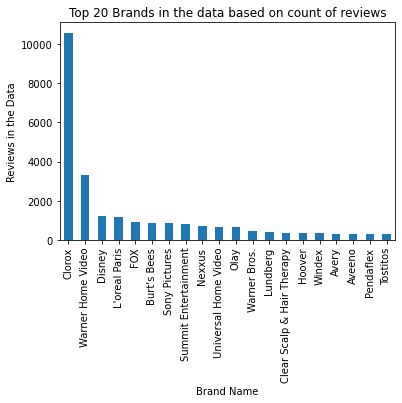

In [214]:
# Display Top 20 Brand names which may help in our further analysis
plt.title('Top 20 Brands in the data based on count of reviews')
data['brand' ].value_counts()[:20].plot(kind='bar')
plt.xlabel('Brand Name')
plt.ylabel('Reviews in the Data')
plt.show()

## Insights:
- We have displayed the Top 20 Brands which has appeared most in our data.

#### `categories`: Category of the product like household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products, health care products and many more.

In [215]:
# store the index of categories
categories_name=data['categories'].value_counts().index

In [216]:
# store the count of each category in the data
categories_val=data[ 'categories'].value_counts().values

In [217]:
# Lets create a dataframe which stores category names and its count in the data
categories=pd.DataFrame({'Category_Name': categories_name, 'category_Count': categories_val})
categories

,Category_Name,category_Count
0,"Household Essentials,Cleaning Supplies,Kitchen...",8545
1,"Movies, Music & Books,Movies,Action & Adventur...",3325
2,"Household Chemicals,Household Cleaners,Bath & ...",2039
3,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",1186
4,"Movies, Music & Books,Movies,Kids' & Family,Wa...",1142
5,"Personal Care,Makeup,Lipstick, Lip Gloss, & Li...",873
6,"Movies, Music & Books,Ways To Shop Entertainme...",845
7,"Movies & TV Shows,Movies,Romance,Romantic Come...",757
8,"Personal Care,Hair Care,Styling Gel/Lotion,Bea...",693
9,"Movies & TV Shows,Instawatch Movies By VUDU,Sh...",672


In [218]:
# Display Top 20 Categories
categories[:20]

,Category_Name,category_Count
0,"Household Essentials,Cleaning Supplies,Kitchen...",8545
1,"Movies, Music & Books,Movies,Action & Adventur...",3325
2,"Household Chemicals,Household Cleaners,Bath & ...",2039
3,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",1186
4,"Movies, Music & Books,Movies,Kids' & Family,Wa...",1142
5,"Personal Care,Makeup,Lipstick, Lip Gloss, & Li...",873
6,"Movies, Music & Books,Ways To Shop Entertainme...",845
7,"Movies & TV Shows,Movies,Romance,Romantic Come...",757
8,"Personal Care,Hair Care,Styling Gel/Lotion,Bea...",693
9,"Movies & TV Shows,Instawatch Movies By VUDU,Sh...",672


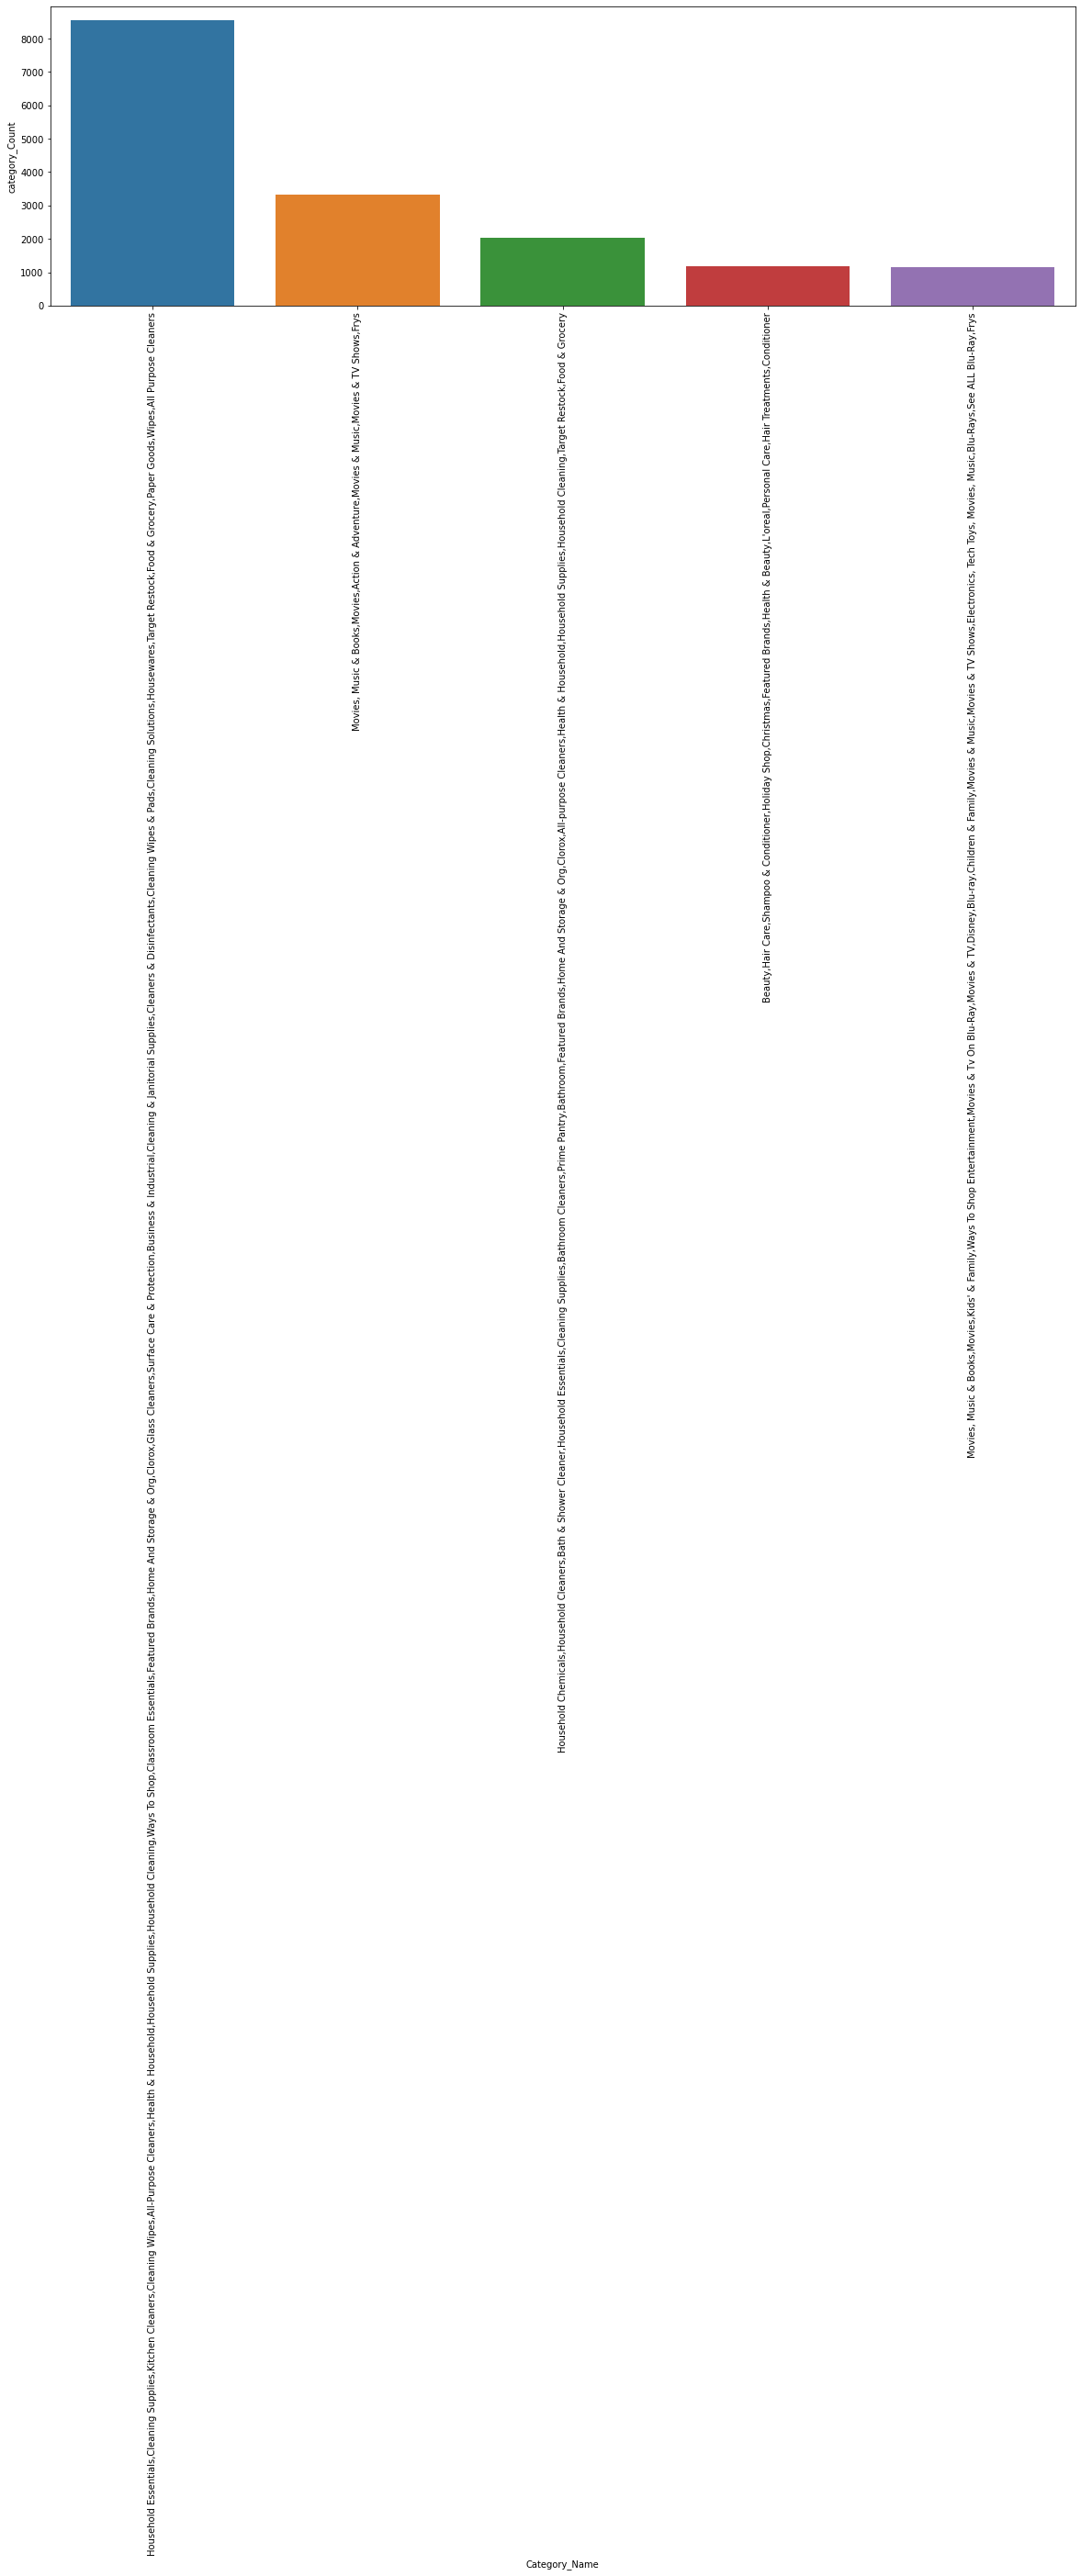

In [219]:
# Display top 5 Categories which has appeared on Top in our dataset
plt. figure(figsize=(20,6))
sns.barplot('Category_Name', 'category_Count', data=categories[:5])
plt.xticks (rotation=90)
plt.show()

## Insights:
- We have displayed the Top 5 categories of products available in our dataset,Lets compare this if required when uing Recommendation algorithm

#### `manufacturer`: Name of the manufacturer of the product

In [220]:
data['manufacturer'].value_counts()

Clorox                                  8687
Test                                    3325
AmazonUs/CLOO7                          2039
L'oreal Paris                           1232
Walt Disney                             1142
Burt's Bees                              873
SONY CORP                                845
Twentieth Century Fox                    757
P&G                                      730
Nexxus Beauty Products                   693
Summit Entertainment                     672
Universal                                668
Lundberg Family Farms                    412
Clear                                    372
Hoover                                   362
Windex                                   348
Aveeno Baby                              313
Avery Dennison                           313
Esselte Corporation                      310
Tostitos                                 265
1200                                     264
Frito-Lay                                258
TIME WARNE

In [221]:
manufacturer_name=data['manufacturer'].value_counts().index

In [222]:
manufacturer_val=data['manufacturer'].value_counts().values

In [223]:
manufacturer=pd.DataFrame({'Manufacturer_Name':manufacturer_name,'Manufacturer_Count':manufacturer_val})
manufacturer

,Manufacturer_Name,Manufacturer_Count
0,Clorox,8687
1,Test,3325
2,AmazonUs/CLOO7,2039
3,L'oreal Paris,1232
4,Walt Disney,1142
5,Burt's Bees,873
6,SONY CORP,845
7,Twentieth Century Fox,757
8,P&G,730
9,Nexxus Beauty Products,693


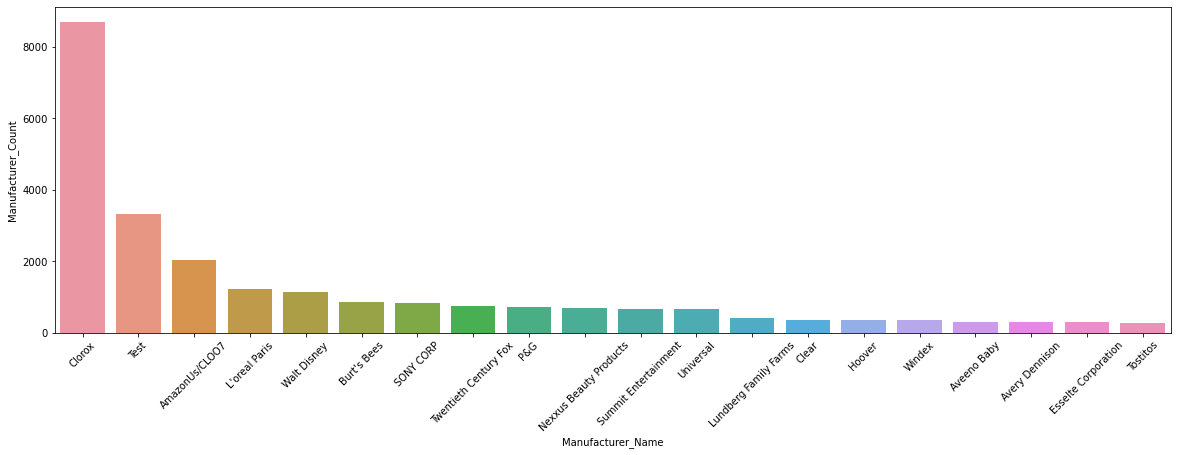

In [224]:
#Bar plot for manufacturer name
plt.figure(figsize=(20,6))
sns.barplot('Manufacturer_Name', 'Manufacturer_Count', data=manufacturer[:20])
plt.xticks (rotation=45)
plt.show()

## Insights:
- We have displayed top 20 manufacturer names from the data
- Top 5 Manufacturers available from our data is `clorox`, `Test` `Amazonus/CL007`, `Lorela Paris` and `Walt Disney`

#### `reviews_date`: Date on which the review has been added by the user

In [225]:
data['reviews_date'].value_counts ().index

Index(['2012-01-26T00:00:00.000Z', '2014-12-03T00:00:00.000Z',
       '2014-09-19T00:00:00.000Z', '2014-12-05T00:00:00.000Z',
       '2014-12-04T00:00:00.000Z', '2012-01-27T00:00:00.000Z',
       '2014-11-07T00:00:00.000Z', '2012-01-28T00:00:00.000Z',
       '2014-12-27T00:00:00.000Z', '2014-12-06T00:00:00.000Z',
       ...
       '2017-01-05T03:22:13.000Z', '2012-02-12T09:21:27.000Z',
       '2014-10-30T19:38:06.000Z', '2010-08-28T00:00:00.000Z',
       '2016-12-28T16:11:48.000Z', '2014-02-09T07:00:00.000Z',
       '2017-01-11T18:21:48.000Z', '2013-05-08T07:00:00.000Z',
       '2017-01-15T08:47:57.000Z', '2012-04-21T05:00:00Z'],
      dtype='object', length=6857)

### Extract year from the date

In [226]:
# Create a new column for extracting the year 
data[ 'year']=[i.split('-') [0] for i in data[ 'reviews_date']]

In [227]:
data[ 'year'].value_counts ().index


Index(['2014', '2015', '2016', '2012', '2017', '2013', '2009', '2011', '2010',
       '2008', '2007', ' hooks slide or swivel into any desired position."',
       '2018'],
      dtype='object')

In [228]:
data['year'].value_counts ().values[:6]

array([8376, 6458, 4956, 4356, 3154, 1334], dtype=int64)

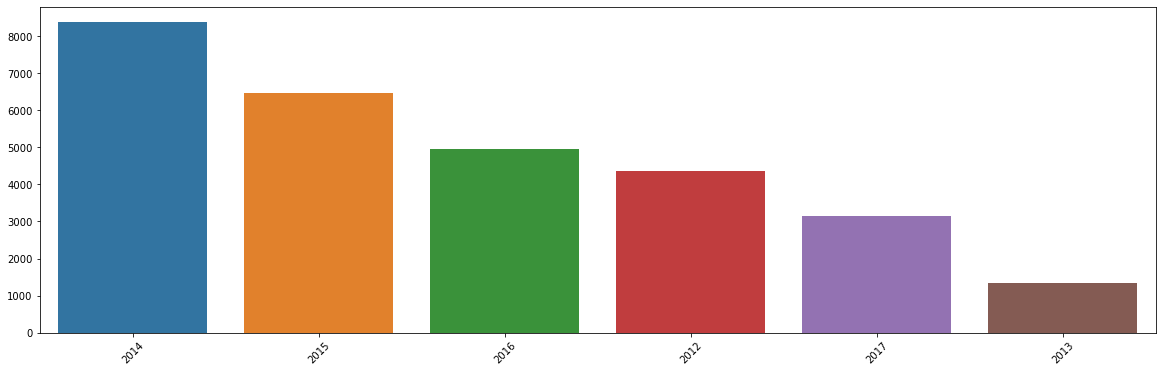

In [229]:
#Bar plot for year
plt.figure(figsize=(20,6))
sns.barplot (data[ 'year'].value_counts ().index[:6], data[ 'year'].value_counts().values [:6])
plt.xticks (rotation=45)
plt.show()

## Insights:
- We could able to extract the year from the `reviews_date` column through which we can understand that our dataset contains more reviews in the year 2014 followed by 2015,2016. 

In [230]:
data.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,year
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive,2012
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,2017


In [231]:
# Create a bar_plot function which is reusbale and produces barplot as output when called by category columns
def bar_plot(x):
    plt. figure(figsize=(10,6))                     # set the plot size as 10,6
    data[x].value_counts(normalize=True).plot(kind="bar")   # use normalise to see the percentage value of categories
    plt.title("Percentage of each Category in {} Feature".format(x),fontdict={'fontsize':15,'color':'red'})
    plt.xlabel(x, fontsize=12)            # set the fint size for x-axis labels
    plt.ylabel('Percentage', fontsize=12)
    plt.ylim([0.0, 1.0])  #limit the y-axis scale
    plt.legend()          # Display the legend in the plot
    plt.show()

#### `reviews_doRecommend`: Whether a particular user has recommended the product or not


In [232]:
# Percentage of each category in reviews_doRecommend column
data['reviews_doRecommend'].value_counts(normalize=True)

True     0.948332
False    0.051668
Name: reviews_doRecommend, dtype: float64

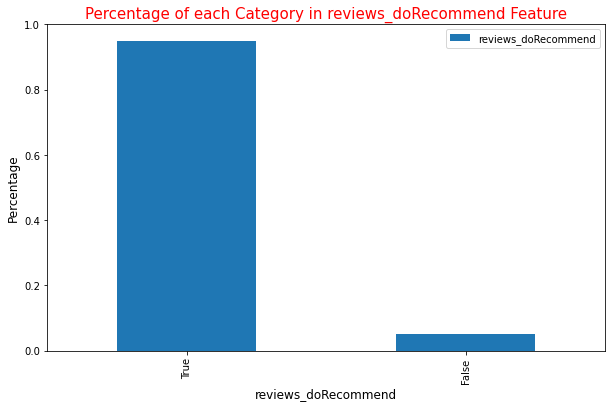

In [233]:
# We use normalizeto visuaise the data in percentage fomrat 
bar_plot('reviews_doRecommend')

## Insights:
- We observed in `reviews_doRecommend` feature True has appeared close to 95 percent and False has appeared in just 5 percent

#### `reviews_rating`: rating given by the user to a particular product

In [234]:
(data['reviews_rating'].value_counts(normalize=True)*100).round(2)

5    69.44
4    20.07
1     4.61
3     4.48
2     1.40
Name: reviews_rating, dtype: float64

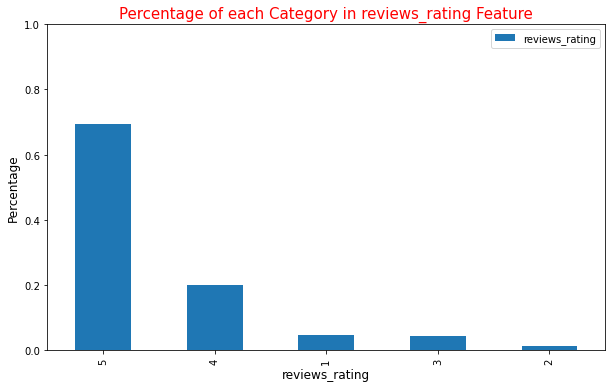

In [235]:
bar_plot('reviews_rating')

## Insights:
- In `reviews_rating` feature ratings has spread with following percentages 5(69%),4(20%),1(4.61%),3(4.48%) and 2(1.4%)

#### `user_sentiment`: The overall sentiment of the user for a particular product (Positive or Negative)

In [236]:
(data['user_sentiment'].value_counts(normalize=True)*100).round(2)

Positive    88.78
Negative    11.22
Name: user_sentiment, dtype: float64

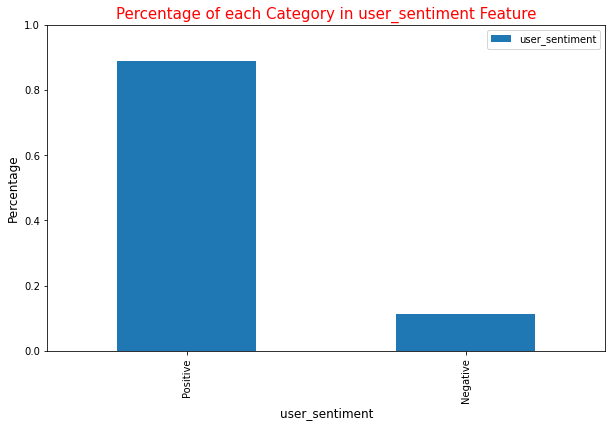

In [237]:
bar_plot('user_sentiment')

## Insights:
- In `user_sentiment` feature Positive sentiment has appeared close to 89 percent and Negative sentiment has appeared close to 12 percent 
- We could see there is a complete class imbalance in this feature and we need to treat this feature since class imbalance may cause problem in sentiment classification.

#### `reviews_doRecommend`: Whether a particular user has recommended the product or not

In [238]:
data['reviews_doRecommend'].value_counts(normalize=True)

True     0.948332
False    0.051668
Name: reviews_doRecommend, dtype: float64

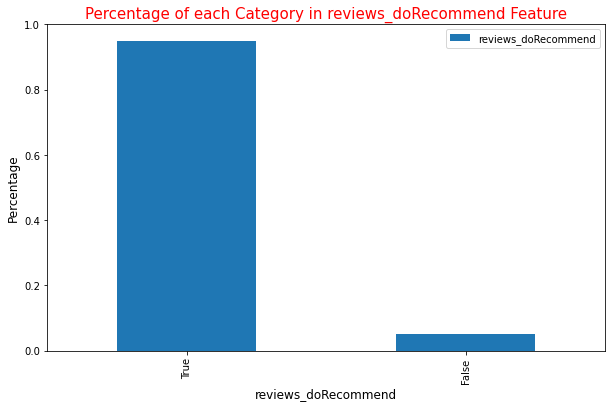

In [239]:
bar_plot('reviews_doRecommend')

## Insights:
- In `reviews_doRecommend` feature True has appeared close to 95 percent and False has appeared 5 percent.
- We could see there is a complete imbalance in this feature, Lets treat if required in further analysis.

#### `reviews_username`: The unique identification for individual user in the dataset

In [240]:
len(data['reviews_username'].value_counts())

24914

In [241]:
data['reviews_username'].value_counts().index

Index(['mike', 'byamazon customer', 'chris', 'lisa', 'tony', 'sandy', 'rick',
       'dave', 'john', 'jojo',
       ...
       'juliegavin', 'skapse', 'speedlift', '1992firebirdgirl', 'jenp333',
       'd0wn2wire', 'bananabre', 'lcs5', 'cfish', 'mandy1989'],
      dtype='object', length=24914)

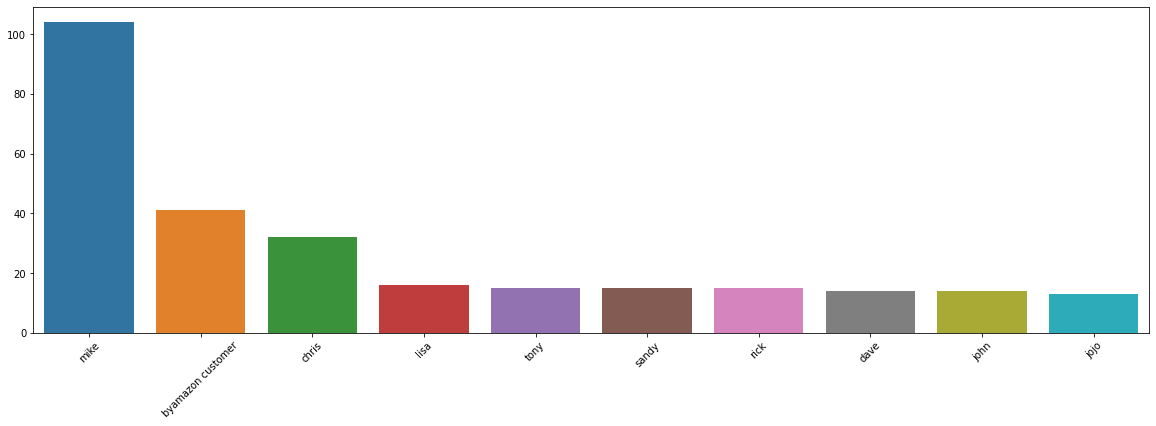

In [242]:
plt.figure(figsize=(20,6))
sns.barplot(data['reviews_username'].value_counts().index[:10],data['reviews_username'].value_counts().values[:10])
plt.xticks (rotation=45)
plt.show()

## Insights:
- We have observed that we have 24914 unique user id's present in the data.
- Top 10 usernames are displayed above, here Top 10 indicates more reviews provided having with the above usernames.

#### `reviews_title`: The title of the review given by the user to a particular product

In [243]:
data['reviews_title'][:10]

0          Just Awesome
1                  Good
2                  Good
3          Disappointed
4            Irritation
5          Not worth it
6         Disappointing
7      Not happy at all
8    Very disappointing
9             Don't buy
Name: reviews_title, dtype: object

## Insights:
- In `reviews_title` we could see the title of reviews, This feature will be helpful for us in Recommendation system

#### `reviews_text`: Review given by the user to a particular product

In [244]:
data['reviews_text'][:5]

0    i love this album. it's very good. more to the...
1    Good flavor. This review was collected as part...
2                                         Good flavor.
3    I read through the reviews on here before look...
4    My husband bought this gel for us. The gel cau...
Name: reviews_text, dtype: object

## Insights:
- In `reviews_text` we could actual comments provided by user for the product, This feature will be helpful for us in Recommendation system

## Lets create the data suitable for sentiment analysis so we can reviews_text, reviews_title and user_sentiment for model building of sentiment analysis

## 7.Text-preprocessing

### Dataframe `data2` is created to use for anlaysis of Data preprocessing

In [245]:
# Create a new dataframe called `data2` to perform data preprocessing 
data2=data[:]
data2.head()  # Display top 5 rows of newly created dataframe

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,year
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive,2012
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,2017
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good flavor.,Good,dorothy w,Positive,2017
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative,2016
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative,2016


### create a new column called reviews which combine `reviews_title` and `reviews_text` 

In [246]:
data2['reviews']=data2['reviews_title']+' '+data2['reviews_text']
data2.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,year,reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive,2012,Just Awesome i love this album. it's very good...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,2017,Good Good flavor. This review was collected as...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good flavor.,Good,dorothy w,Positive,2017,Good Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative,2016,Disappointed I read through the reviews on her...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative,2016,Irritation My husband bought this gel for us. ...


## Inisghts:
- we have combined both `reviews_title` and `reviews_text` into `reviews` which 

In [247]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29999 non-null  object
 1   brand                29999 non-null  object
 2   categories           29999 non-null  object
 3   manufacturer         29999 non-null  object
 4   name                 29999 non-null  object
 5   reviews_date         29999 non-null  object
 6   reviews_doRecommend  29999 non-null  bool  
 7   reviews_rating       29999 non-null  int64 
 8   reviews_text         29999 non-null  object
 9   reviews_title        29999 non-null  object
 10  reviews_username     29999 non-null  object
 11  user_sentiment       29999 non-null  object
 12  year                 29999 non-null  object
 13  reviews              29999 non-null  object
dtypes: bool(1), int64(1), object(12)
memory usage: 3.0+ MB


### Convert the `positive` and `Negative` sentiments into `1` and `0` which will help for our model building

In [248]:
# Convert Postive and Negative values in the column `usersentiment` to make data suitable for model building
data2['user_sentiment']=data2['user_sentiment'].replace({'Positive':1,'Negative':0})
data2.head(3)

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,year,reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1,2012,Just Awesome i love this album. it's very good...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good flavor. This review was collected as part...,Good,dorothy w,1,2017,Good Good flavor. This review was collected as...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good flavor.,Good,dorothy w,1,2017,Good Good flavor.


### Insights:
- As observed in the above dataframe we have treated the user_sentiment feature and converted Positive tag to 1 and Negatuive tag to 0

In [249]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29999 non-null  object
 1   brand                29999 non-null  object
 2   categories           29999 non-null  object
 3   manufacturer         29999 non-null  object
 4   name                 29999 non-null  object
 5   reviews_date         29999 non-null  object
 6   reviews_doRecommend  29999 non-null  bool  
 7   reviews_rating       29999 non-null  int64 
 8   reviews_text         29999 non-null  object
 9   reviews_title        29999 non-null  object
 10  reviews_username     29999 non-null  object
 11  user_sentiment       29999 non-null  int64 
 12  year                 29999 non-null  object
 13  reviews              29999 non-null  object
dtypes: bool(1), int64(2), object(11)
memory usage: 3.0+ MB


In [250]:
data2['user_sentiment'].value_counts(normalize=True)

1    0.887763
0    0.112237
Name: user_sentiment, dtype: float64

## Inisghts:
- From the above cell we have understood that our data contains around 88 percent of positive reviews and 12 percent of Negatve reviews, Which is a complete indication of class imbalance which we will take care while building the model

### Dataframe `data3` is created to use for Data cleaning task and use for model building

In [251]:
#Dataframe data3 is created from data2
data3=data2[:]
data3.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,year,reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1,2012,Just Awesome i love this album. it's very good...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good flavor. This review was collected as part...,Good,dorothy w,1,2017,Good Good flavor. This review was collected as...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good flavor.,Good,dorothy w,1,2017,Good Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,I read through the reviews on here before look...,Disappointed,rebecca,0,2016,Disappointed I read through the reviews on her...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,0,2016,Irritation My husband bought this gel for us. ...


## Data cleaning Steps:
- stopword Removal
- punctuation Removal
- stemming and lemmatisation

## Convert text to tokens with some of the following Approaches
- Bag-of-words(BOW)
- Tf-IDF(term frequency - Inverse Document frequency)
- word2vec
- Glove embeddings
- Count vectoriser

## Data Cleaning

In [252]:
data3.head(1)

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,year,reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1,2012,Just Awesome i love this album. it's very good...


## Remove the reviews having length less than 150 words

### Independent variable(x) creation from the text data, Lets use reviews feature from dataset and make the feature ready for model building

### Lets clean the data 
- 1. In the next step we have converted all the sentences to lower case.
- 2. We used regex and eliminated additional characters other than alphabets and numeric values
- 3. Applying lemmatisation since it may produce good results thn stemming because stemming may not handle some of the words and output of lemmatisation is more meaningful than stemming technique, SO we prefer going with lemmatisation in our project

In [253]:
# Initialise the empty corpus which we can use to store the cleaned corpus data after Data preprocessing
corpus=[] 

# Clean the data as shown below
for sentence in data3['reviews']:    
    #1.Lowering the sentences: To eliminate the casesensitive we are lowering all the sentences
    sentence=sentence.lower()    
    
    #2.Use regex to eliminate characters other than alphabets and numbers 
    sentence=re.sub('[^a-zA-Z0-9]',' ',sentence)
    
    #3.Unnecessary Space elimination from the data
    sentence=sentence.split()
    
    #4.Join the sentence with spaces in between and split the data suitable for prerpocessing
    sentence=' '.join(sentence)
    sentence=sentence.split()
    
    #5.Remove stopwords from the data and Apply Lemmatisation on the data
    sentence=[lm.lemmatize(word) for word in sentence if word not in set(stopwords.words('english'))]
    
    #6.Append the preprocessed data into corpus
    corpus.append(' '.join(sentence))

## Insights:
- Now our data is cleaned from special characters and additional spaces and we have applied lemmatisation to find the root word for the given words.

In [254]:
#Display the Top 10 Corpus values after performing data cleaning
corpus[:10]

['awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy',
 'good good flavor review collected part promotion',
 'good good flavor',
 'disappointed read review looking buying one couple lubricant ultimately disappointed even live review read starter neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquid vaseline difficult clean pleasant especially since lacked captivating sensation expecting disappointed paid much lube use could use normal personal lubricant 1 le money 2 le mess',
 'irritation husband bought gel u gel caused irritation felt like burning skin recommend gel',
 'worth boyfriend bought spice thing bedroom highly disappointed product bought one absolutely love ky mine thought would similar affect absolutely nothing buy',
 'disappointing bought earlier today excited check based product description expecting something like regular ky fan expected left 

## Insights:
- As mentioned in previous steps we have taken necessary actions to make the text data ready for model building.

In [255]:
# Add the cleaned corpus data into dataframe `data3` with new feature called `reviews_cleaned`
data3['reviews_cleaned']=corpus
data3.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,year,reviews,reviews_cleaned
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1,2012,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good flavor. This review was collected as part...,Good,dorothy w,1,2017,Good Good flavor. This review was collected as...,good good flavor review collected part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good flavor.,Good,dorothy w,1,2017,Good Good flavor.,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,I read through the reviews on here before look...,Disappointed,rebecca,0,2016,Disappointed I read through the reviews on her...,disappointed read review looking buying one co...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,0,2016,Irritation My husband bought this gel for us. ...,irritation husband bought gel u gel caused irr...


## Insights:
- We have appended cleaned corpus data in to dataframe called `data3`

In [256]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29999 non-null  object
 1   brand                29999 non-null  object
 2   categories           29999 non-null  object
 3   manufacturer         29999 non-null  object
 4   name                 29999 non-null  object
 5   reviews_date         29999 non-null  object
 6   reviews_doRecommend  29999 non-null  bool  
 7   reviews_rating       29999 non-null  int64 
 8   reviews_text         29999 non-null  object
 9   reviews_title        29999 non-null  object
 10  reviews_username     29999 non-null  object
 11  user_sentiment       29999 non-null  int64 
 12  year                 29999 non-null  object
 13  reviews              29999 non-null  object
 14  reviews_cleaned      29999 non-null  object
dtypes: bool(1), int64(2), object(12)
memory usage: 3.2+ M

In [257]:
l=[] #create a new empty list
for i in data3['reviews_cleaned']:#Take each review and measure the count of words in each review and append it to the list `l`
    l.append((len(i.split())))

## Insights:
- list `l` contains the count of words in each review of our data

In [258]:
#check the percentile values of the word count in each review
np.quantile(l,[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,0.995,0.997,0.998,0.999,1])

array([  1.   ,   8.   ,  10.   ,  11.   ,  13.   ,  15.   ,  17.   ,
        21.   ,  26.   ,  36.   ,  48.   ,  86.   , 109.   , 127.   ,
       140.   , 173.008, 554.   ])

## Insights:
- We have taken percentile approach to see how many words are present in each review, We observed that 99.9 percentile of reviews just contain 173 words in it.
- We have observed there are 140 wods in each sentence when we take 99.98 percent of values, Lets consider only the words with 150 words in sentence for further analsyis, Since conisdering other words amy increase vecti count while building model and may mislead our data in model building.

In [259]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29999 non-null  object
 1   brand                29999 non-null  object
 2   categories           29999 non-null  object
 3   manufacturer         29999 non-null  object
 4   name                 29999 non-null  object
 5   reviews_date         29999 non-null  object
 6   reviews_doRecommend  29999 non-null  bool  
 7   reviews_rating       29999 non-null  int64 
 8   reviews_text         29999 non-null  object
 9   reviews_title        29999 non-null  object
 10  reviews_username     29999 non-null  object
 11  user_sentiment       29999 non-null  int64 
 12  year                 29999 non-null  object
 13  reviews              29999 non-null  object
 14  reviews_cleaned      29999 non-null  object
dtypes: bool(1), int64(2), object(12)
memory usage: 3.2+ M

## Remove the reviews having length less than 150 words

In [260]:
#store the count of reviews in the data which will help in for loop to loop through the reviews ion our data
counter=len(data3['reviews_cleaned'])
counter

29999

In [261]:
#create a empty indexes variable which helps in storing index values of words with more than 150 words in a review
indexes=[]

In [262]:
# Remove rows where the reviews length is greater than 150 words
for i,j in zip(range(counter+1),data3['reviews_cleaned']):
    if(len(j.split())>150):  #words greater than 150.
        if(j == (data3['reviews_cleaned'][i])):
            indexes.append(i)             

In [263]:
print(indexes)

[1788, 1845, 3346, 3415, 3443, 3747, 3957, 4207, 4262, 4314, 4408, 4411, 4449, 4471, 4487, 5433, 7157, 15903, 16791, 16932, 17084, 17150, 17166, 17637, 20803, 20804, 21997, 21998, 22000, 22001, 22002, 22616, 22660, 22692, 23794, 24213, 24467, 25847, 26164, 26458, 27065, 28421, 28436, 28461, 28963, 28971, 29066, 29521]


In [264]:
print(len(indexes))

48


## Isights:
- We have got 48 indexes in which reviews contain more than 150 words in it, Lets drop these indexes in next step.

In [265]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29999 non-null  object
 1   brand                29999 non-null  object
 2   categories           29999 non-null  object
 3   manufacturer         29999 non-null  object
 4   name                 29999 non-null  object
 5   reviews_date         29999 non-null  object
 6   reviews_doRecommend  29999 non-null  bool  
 7   reviews_rating       29999 non-null  int64 
 8   reviews_text         29999 non-null  object
 9   reviews_title        29999 non-null  object
 10  reviews_username     29999 non-null  object
 11  user_sentiment       29999 non-null  int64 
 12  year                 29999 non-null  object
 13  reviews              29999 non-null  object
 14  reviews_cleaned      29999 non-null  object
dtypes: bool(1), int64(2), object(12)
memory usage: 3.2+ M

In [266]:
#Drop teh rows where index values are as mentioned in the index list above
data3.drop(indexes,inplace=True)
data3.reset_index(inplace=True)

In [267]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29951 entries, 0 to 29950
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                29951 non-null  int64 
 1   id                   29951 non-null  object
 2   brand                29951 non-null  object
 3   categories           29951 non-null  object
 4   manufacturer         29951 non-null  object
 5   name                 29951 non-null  object
 6   reviews_date         29951 non-null  object
 7   reviews_doRecommend  29951 non-null  bool  
 8   reviews_rating       29951 non-null  int64 
 9   reviews_text         29951 non-null  object
 10  reviews_title        29951 non-null  object
 11  reviews_username     29951 non-null  object
 12  user_sentiment       29951 non-null  int64 
 13  year                 29951 non-null  object
 14  reviews              29951 non-null  object
 15  reviews_cleaned      29951 non-null  object
dtypes: b

# Insights:
- As observed we have removed 48 rows where reviews contains more than 150 words in it,Now we have 29951 rows of data , Lets try building the model with the data, Since our data has went through preprocessing steps like stopwords removal,lemmatisation and number of words in each review.

### We have removed reviews where word count in reviews feature is greater than 150 consider this feature as input to our sentiment analysis model.

In [268]:
x=data3['reviews_cleaned']
x.head()

0    awesome love album good hip hop side current p...
1     good good flavor review collected part promotion
2                                     good good flavor
3    disappointed read review looking buying one co...
4    irritation husband bought gel u gel caused irr...
Name: reviews_cleaned, dtype: object

## Insights:
- All the `reviews_cleaned` are stored in variable x

In [269]:
y=data3['user_sentiment']
y.head()

0    1
1    1
2    1
3    0
4    0
Name: user_sentiment, dtype: int64

## Insights:
- Dependent variable is created with usersentiment variable

### Selection between CountVectoriser and Bag-Of-Words Approach for converting words to vector:
- Since TF-IDF is more generalisable approach than CountVectoriser we are following TF-IDF as our first approach in later steps we will use Word2Vec model as well.

In [270]:
# TF-IDF: Term frequency - Inverse document frequency
x=tf.fit_transform(x).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Insights:
- We have transformed words into vectors, which is suitable for model building.

In [271]:
from sklearn.model_selection import train_test_split

In [272]:
# stratify=y is used to equally spread the categories in the data in this case categories indicates 1 and 0
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

## From initial analysis we know that data is imbalanced ets treat them using calss imbalance Techniques

In [273]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22463, 5000)
(7488, 5000)
(22463,)
(7488,)


## Insights:
- Now the words are converted into the above mentioned shapes , In which we have to understand that now each input vector/row is of shape(1,5000).

In [274]:
y_train.value_counts(normalize=True)

1    0.887593
0    0.112407
Name: user_sentiment, dtype: float64

In [275]:
y_test.value_counts(normalize=True)

1    0.887553
0    0.112447
Name: user_sentiment, dtype: float64

## Insights:
- we have observed in training data that we have almost 89 percent of reviews are showing as poistive which is complete imbalance and we observed he same details in EDA, Lets treat this using calss imbalance techniques before fitting this to the model

## 8.Treatment for Class Imbalance

## Lets treat class imbalance using Oversampling techniques wither through SMOTE or use base sampler called SMOTETomek to make our target calss balanced

In [276]:
import imblearn
from imblearn.combine import SMOTETomek

In [277]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(0.5,random_state=42)  # take value for splitting as 0.5 which indicates minority class is almost equal to half ofthe majority class in our data
x_train_SMOTE, y_train_SMOTE = smt.fit_resample(x_train, y_train)

In [278]:
print(x_train_SMOTE.shape)
print(y_train_SMOTE.shape)

(29907, 5000)
(29907,)


In [279]:
#Training data fro dependent variable before treating class imbalance Techniques
y_train.value_counts()

1    19938
0     2525
Name: user_sentiment, dtype: int64

In [280]:
#Training data for dependent variable after SMOTE analyis in which we applied oversampling technique
y_train_SMOTE.value_counts()

1    19938
0     9969
Name: user_sentiment, dtype: int64

## Insights:
- As mentioned in the aboe steps we have treated the class imbalance using Oversampling techniques, Now our model is suitable for model building

## 9.Implementation of Machine learning models after Treatment of Class Imbalance in our dataset

## Naivebayes

In [281]:
# Import bernoulli Naivebayes
from sklearn.naive_bayes import BernoulliNB

In [282]:
# Initialise the BernouliNB model since our target variable is a binary class.
nbc=BernoulliNB()

In [283]:
# Fit the data which is treated with calss imbalance
nbc.fit(x_train_SMOTE,y_train_SMOTE)

BernoulliNB()

In [284]:
#Make predcitions on test data
y_pred=nbc.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Evaluation Metrics for Naive Bayes model

In [285]:
#Accuracy of Naive Bayes model
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8452190170940171


In [286]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))


[[ 336  506]
 [ 653 5993]]


In [287]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.40      0.37       842
           1       0.92      0.90      0.91      6646

    accuracy                           0.85      7488
   macro avg       0.63      0.65      0.64      7488
weighted avg       0.86      0.85      0.85      7488



In [288]:
print("precision score",precision_score(y_test,y_pred))
print("Recall score",recall_score(y_test,y_pred))

precision score 0.9221418679796892
Recall score 0.9017454107733975


## Insights:
- We have 85 percent of accuracy using naiveBayes model

## Logistic regression

In [289]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [290]:
#Fit the model on logistic regression
lr.fit(x_train_SMOTE,y_train_SMOTE)

LogisticRegression()

In [291]:
#Make predictions on test data
y_pred=lr.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

### Evaluation Metrics for Logistic regression

In [292]:
#Accuracy of Logistic Regression
print("Accuracy:" ,accuracy_score(y_test, y_pred))

Accuracy: 0.9015758547008547


In [293]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))


[[ 536  306]
 [ 431 6215]]


In [294]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.64      0.59       842
           1       0.95      0.94      0.94      6646

    accuracy                           0.90      7488
   macro avg       0.75      0.79      0.77      7488
weighted avg       0.91      0.90      0.90      7488



In [295]:
print("precision score",precision_score(y_test,y_pred))
print("Recall score",recall_score(y_test,y_pred))

precision score 0.9530746817972704
Recall score 0.9351489617815227


## Insights:
- We have 90 percent Accuracy using Logistic regression model

## random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [120]:
# Initise some of the parameters for random forest
rc=RandomForestClassifier(random_state=42,n_jobs=-1)

In [121]:
# Create different parameter values which helps in performing Gridsearch cv 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200,400]
}

In [122]:
# Instantiate the grid search model with 4 fold cross validation(cv=4)
grid_search = GridSearchCV(estimator=rc, param_grid=params,cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [123]:
%%time
grid_search.fit(x_train_SMOTE,y_train_SMOTE)

Fitting 4 folds for each of 450 candidates, totalling 1800 fits
Wall time: 50min 41s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200, 400]},
             scoring='accuracy', verbose=1)

In [124]:
# Best parameters for our data
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=10,
                       n_estimators=10, n_jobs=-1, random_state=42)

In [125]:
# Initialise the model with parameters which are optimal for our data
rc=RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=10,n_estimators=10, n_jobs=-1, random_state=42)
rc

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=10,
                       n_estimators=10, n_jobs=-1, random_state=42)

In [126]:
# Fit the random Forest classifier
rc.fit(x_train_SMOTE,y_train_SMOTE)

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=10,
                       n_estimators=10, n_jobs=-1, random_state=42)

In [127]:
# Prediction on test data
y_pred=rc.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Evaluation Metrics

In [128]:
#Accuracy on random Forest
print("Accuracy: ",accuracy_score(y_test, y_pred))

0.8874198717948718


In [129]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))


[[   3  839]
 [   4 6642]]


In [130]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.00      0.01       842
           1       0.89      1.00      0.94      6646

    accuracy                           0.89      7488
   macro avg       0.66      0.50      0.47      7488
weighted avg       0.84      0.89      0.84      7488



In [131]:
print("precision score: ",precision_score(y_test,y_pred))
print("Recall score: ",recall_score(y_test,y_pred))

precision score:  0.8878492180189814
Recall score:  0.9993981342160698


## Insights:
- We have got 89 percent accuracy for random Forest model

## TF-IDF Approach results for various models

1.Naive Bayes: 
- Accuracy: 85 Precision: 92 Recall: 90

2.Logistic regression:
- Accuracy: 90 Precision: 95 Recall: 94

3.Random Forest:
- Accuracy: 89  Precision: 89 Recall: 100

## 10.Word2Vec

### Converting word into vectors is a basic task which we need to perform and here are quite few techniques like count vectoriser,TF-IDF and word2vec, Here we are using Word2Vec

In [296]:
#Import Wod2Vec which is available in gensim library
import gensim
from gensim.models.word2vec import Word2Vec

In [297]:
#Import spacy library which helps in converting words to vectors
import spacy
import en_core_web_lg
nlp=en_core_web_lg.load()

In [298]:
# create a function called `generate_vector` which uses spacy large corpus to provide vectors for the given word
def generate_vector(x):
    nlpdocument=nlp(x) #pass the input to the loaded english large corpus data
    return nlpdocument.vector

In [299]:
#create a feature called wordvector which stores the words in a vector fashion which can be input for our machine leaning models
data3['wordvector']=data3['reviews_cleaned'].apply(lambda x:generate_vector(x))

In [300]:
data3.head(1)

,index,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,year,reviews,reviews_cleaned,wordvector
0,0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1,2012,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...,"[-0.06113065, 0.20242092, -0.10737004, 0.02089..."


## Insights:
- We could see reviews are converted to vector form using word2vec technique and stored in the variabe called `wordvector` and vect

In [301]:
x=data3['wordvector'].to_numpy()
x=x.reshape(-1,1)

In [302]:
x.shape

(29951, 1)

## Insights:
- We could see eventhough data is in 300 dimension data but complete data is stored in an array so lets reform the variable x into its original shape of 300 columns/vector represntation

In [303]:
x= np.concatenate(np.concatenate(x,axis=0),axis=0).reshape(-1,300)

In [304]:
x.shape

(29951, 300)

## Insights:
- As mentioned in the above step we have converted the data into 300 vector representation

In [305]:
#Target column
y=data3['user_sentiment']
y.head()

0    1
1    1
2    1
3    0
4    0
Name: user_sentiment, dtype: int64

## train-test-Split 

In [306]:
#stratify=y is used to split the target features in a equal distribution
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

In [307]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22463, 300)
(7488, 300)
(22463,)
(7488,)


### From initial analysis as well we know that data is imbalanced Lets treat them using calss imbalance Techniques

In [308]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(0.5,random_state=42)
x_train_SMOTE, y_train_SMOTE = smt.fit_resample(x_train, y_train)

In [309]:
print(x_train_SMOTE.shape)
print(y_train_SMOTE.shape)

(29907, 300)
(29907,)


In [310]:
y_train.value_counts()

1    19938
0     2525
Name: user_sentiment, dtype: int64

In [311]:
y_train_SMOTE.value_counts()

1    19938
0     9969
Name: user_sentiment, dtype: int64

## Insights:
- As obsrved we have treated the class imbalance and now y_tarin_SMOTE has 19938 positive rating and 9969 Negative rating.
- Class Imbalance of 90-10percent is treated now.

## Naivebayes after smote analysis

In [312]:
from sklearn.naive_bayes import BernoulliNB

In [313]:
#Initialise the Naive Bayes model
nbc=BernoulliNB()

In [314]:
#Fit the naive bayes model
nbc.fit(x_train_SMOTE,y_train_SMOTE)

BernoulliNB()

In [315]:
# Make prediction son test data
y_pred=nbc.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

## Evaluation Metrics

In [316]:
#Accuracy of NaiveBayes model
print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.733573717948718


In [317]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))


[[ 587  255]
 [1740 4906]]


In [318]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.70      0.37       842
           1       0.95      0.74      0.83      6646

    accuracy                           0.73      7488
   macro avg       0.60      0.72      0.60      7488
weighted avg       0.87      0.73      0.78      7488



## Insights:
- We have got 73 percent accuracy in Naive Bayes model after treating data with word2vec

## Logistic regression

In [319]:
from sklearn.linear_model import LogisticRegression
lr2=LogisticRegression()

In [320]:
#Fit the logitsic regression model on Training data
lr2.fit(x_train_SMOTE,y_train_SMOTE)

LogisticRegression()

In [321]:
# Make predictions on test data
y_pred=lr2.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

## Evaluation Metrics

In [322]:
#Accuracyof Logistic Regression
print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.8577724358974359


In [323]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))


[[ 543  299]
 [ 766 5880]]


In [324]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.64      0.50       842
           1       0.95      0.88      0.92      6646

    accuracy                           0.86      7488
   macro avg       0.68      0.76      0.71      7488
weighted avg       0.89      0.86      0.87      7488



## Insights:
- We have got 86 accuracy using Logistic regression suing Word2vec Technique

## random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [126]:
rc=RandomForestClassifier(random_state=42,n_jobs=-1)

In [127]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200,400]
}

In [128]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rc, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [129]:
%%time
grid_search.fit(x_train_SMOTE,y_train_SMOTE)

Fitting 4 folds for each of 450 candidates, totalling 1800 fits
Wall time: 1h 15min 58s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200, 400]},
             scoring='accuracy', verbose=1)

In [130]:
#Random forest Best estimator
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_estimators=400, n_jobs=-1, random_state=42)

In [131]:
# Instantiate the data with best parameters
rc=RandomForestClassifier(max_depth=20,max_features=4, min_samples_leaf=5,n_estimators=400, n_jobs=-1, random_state=42)
rc

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_estimators=400, n_jobs=-1, random_state=42)

In [132]:
#Fit the model
rc.fit(x_train_SMOTE,y_train_SMOTE)

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_estimators=400, n_jobs=-1, random_state=42)

In [133]:
#Predict the output
y_pred=rc.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [138]:
#Accuracy
print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.9039797008547008


In [139]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))


[[ 200  642]
 [  77 6569]]


In [140]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.24      0.36       842
           1       0.91      0.99      0.95      6646

    accuracy                           0.90      7488
   macro avg       0.82      0.61      0.65      7488
weighted avg       0.89      0.90      0.88      7488



## Word2Vec Embedding Technique results for various models

1.Naive Bayes: 
- Accuracy: 73 Precision:95  Recall: 74

2.Logistic regression:
- Accuracy: 86 Precision:95  Recall: 88

3.Random Forest:
- Accuracy: 90  Precision:91  Recall: 99

## Final Model Decision for Deployment:
- From the above result Considering Accuracy and Precision TF-IDF with Logistic regression and Word2Vec with RandomForest is performing better
- Logistic Regression with TF-IDF has performed better with Accuracy,Precision and Recall values and is more generalisable on test data than RandomForest with Word2Vec so lets deploy model with Linear Regression with TF-IDF Approach

# 11.Recommendation system

## Lets build Recommendation system then we integrate sentiment based system with Recommendation system

# Lets build recommendation models for product recommendation using
- User based Recommendation 
- item Based Recommendation

### Lets create a new dataframe called `data4` for recommendation algorithm building

In [93]:
data4=data3[:]
data4.head(3)

,index,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,year,reviews,reviews_cleaned
0,0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1,2012,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...
1,1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good flavor. This review was collected as part...,Good,dorothy w,1,2017,Good Good flavor. This review was collected as...,good good flavor review collected part promotion
2,2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good flavor.,Good,dorothy w,1,2017,Good Good flavor.,good good flavor


### We have created a new dataframe called data4  using this dataframe we can start careating recommendation systems

## 12.User-User based Approach

In [94]:
# Splitting dataset into recommend_train(training) and recommend_test(testing) datasets 
from sklearn.model_selection import train_test_split
recommend_train, recommend_test = train_test_split(data4, test_size=0.2, random_state=42)

## Insights:
- In the previous step we have divided data into train and test format which will help us in validating our Recommendation system once training is completed

In [95]:
# Dump the training data into a file name called traindata.pkl
pickle.dump(recommend_train,open('traindata.pkl','wb'))

In [96]:
print("Shape of training data:",recommend_train.shape)
print("Shape of testing data: ",recommend_test.shape)

Shape of training data: (23960, 16)
Shape of testing data:  (5991, 16)


## Insights:
- We have successfully converted complete data into train and test data called `recommend_train` and `recommend_test`
- We have observed that we have 17 features but very few features are required for Recommendation system Training.
- Lets consider following features for Recommendation system: `reviews_username` , `reviews_rating` and `name`

In [97]:
data4.head(1)

,index,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,year,reviews,reviews_cleaned
0,0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1,2012,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...


### Verify the reviews_rating column to understand how ratings are  spread out in the dataset

In [98]:
(data4['reviews_rating'].value_counts(normalize=True)*100).round(2)

5    69.46
4    20.06
1     4.62
3     4.47
2     1.39
Name: reviews_rating, dtype: float64

## Insights:
- We can seen that we have ratings and there percentage of occurence in the data shown above
- Rating 5 :69%
- Rating 4 : 20.06%
- Rating 1 and 3 close to 5%
- rating 2 with close to 1.4%

In [99]:
# Create a dataframe called `df_pivot` in which we store data in a pivot table fashion
# pivot is created on training data(recommend_train) to see how rating is provided by different users for different products
# Lets fill nan values with 0
# name: indicates product name

df_pivot = recommend_train.pivot_table(index='reviews_username',values='reviews_rating',columns='name').fillna(0)
df_pivot.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Cal Lighting Led Dark Bronze Finish Metal Piano Lamp,Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Citrus Magic Instant Spot & Stain Remover,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage",Craft Punch Giga Scallop Circle 45 24687534 To 334,"Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Every Ma

### Lets Create Dummy train & Dummy test 

- `Dummy train` will be used for prediction of the products which has not been rated by the user. To ignore the products rated by the user, we will mark it as 0 during prediction.
 - The products not rated by user is marked as 1 for prediction in dummy train dataset. 

- `Dummy test` will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1.

In [100]:
# Copy the training(recommend_train) dataset into dummy_recommendtrain
dummy_recommendtrain = recommend_train.copy()

In [101]:
# Function to return 0 if ratings are more than 1,else return 1
def rating(x):
    if x>=1:
        return 0
    else:
        return 1

In [102]:
# For prediction purpose lets mark as 1 for Products not rated by the user. 
dummy_recommendtrain['reviews_rating'] = dummy_recommendtrain['reviews_rating'].apply(rating)

In [103]:
# Convert the dummy_recommendtrain dataset into matrix format.
dummy_recommendtrain = dummy_recommendtrain.pivot_table(index='reviews_username',values='reviews_rating',columns='name').fillna(1)

In [104]:
dummy_recommendtrain.head(5)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Cal Lighting Led Dark Bronze Finish Metal Piano Lamp,Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Citrus Magic Instant Spot & Stain Remover,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage",Craft Punch Giga Scallop Circle 45 24687534 To 334,"Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Every Ma

## Insights:
- We have replaced nan values with 1 in `dummy_recommendation` dataframe

**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different prodcuts.



# User Similarity Matrix

### Usersimilarity Matrix: 
- User similarity matrix is calculated using pairwise_distance.

## 1.Using Cosine Similarity

In [105]:
#calculate usercorrelation
usercorrelation = 1 - pairwise_distances(df_pivot, metric='cosine')
usercorrelation[np.isnan(usercorrelation)] = 0
print(usercorrelation)

[[1.        0.        0.        ... 0.        0.9486833 0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.9486833 0.        0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]


## Insights:
- we have applied cosine similarity on the dataframe lets use adjusted cosine for better Reommendation perfomance

## 2.Using adjusted Cosine Similarity

### Here, we are not removing the NaN values and calculating the mean only for the products rated by the user

In [106]:
# Create a user-product matrix.
# In user based Recommendation system we consider username as index and product names as columns and values as Rating of product
df_pivot = recommend_train.pivot_table(index='reviews_username',values='reviews_rating',columns='name')

In [107]:
df_pivot.tail(10)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Cal Lighting Led Dark Bronze Finish Metal Piano Lamp,Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Citrus Magic Instant Spot & Stain Remover,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage",Craft Punch Giga Scallop Circle 45 24687534 To 334,"Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Every Ma

### Normalising the rating of the products for each user around 0 mean

In [108]:
# Lets normalise the rating since people may have a tendency of giving higher rating of 4 eventhough for other users its just 3
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [109]:
df_subtracted.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Cal Lighting Led Dark Bronze Finish Metal Piano Lamp,Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Citrus Magic Instant Spot & Stain Remover,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage",Craft Punch Giga Scallop Circle 45 24687534 To 334,"Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Every Ma

### Finding cosine similarity

In [110]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Insights:
- We have applied cosine similarity on our dataset and replaced nan values of user_correlation with 0

## Prediction - User User correlation 

#### Lets make the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So we ignore the correlation for values less than 0. 

In [111]:
#Ignore values less than 0, Since we are considering positive reviews only in our application
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Insights:
- We have applied strategy for users which are positively related for orther users since we are ineseted in calculating more similar to the current users

Rating predicted by the user (for products rated as well as not rated) is the weighted sum of correlation with the product rating (as present in the rating dataset). 

In [112]:
UserPredictedRatings = np.dot(user_correlation, df_pivot.fillna(0))
UserPredictedRatings

array([[0.        , 5.84486044, 0.        , ..., 4.59480406, 0.42640143,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero. 

### Lets multiply the userpredictedratings with dummy_recommendtrain to form our finalrating DaaFrame

In [113]:
#Create Finalrating by multiplying userpredictedratings with dummyrecommendtrain data
FinalRating = np.multiply(UserPredictedRatings,dummy_recommendtrain)
FinalRating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Cal Lighting Led Dark Bronze Finish Metal Piano Lamp,Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Citrus Magic Instant Spot & Stain Remover,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage",Craft Punch Giga Scallop Circle 45 24687534 To 334,"Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Every Ma

## Insights:
- We have obtained the Rating value on each products for which user has provided Rating

### Finding the top 5 recommendation for the *user*

In [114]:
# Take the user ID as input.
user_input = input("Enter your user name ")
print(user_input)

Enter your user name joshua
joshua


In [115]:
# Dump the user final rating
pickle.dump(FinalRating,open('FinalRating.pkl','wb'))

In [116]:
Top20Recommendations = FinalRating.loc[user_input].sort_values(ascending=False)[0:20]
Top20Recommendations

name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    8.701660
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                          5.574343
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                               4.555349
The Resident Evil Collection 5 Discs (blu-Ray)                                     4.041190
Chester's Cheese Flavored Puffcorn Snacks                                          2.945087
Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1                                2.766993
Hormel Chili, No Beans                                                             2.691026
Tostitos Bite Size Tortilla Chips                                                  2.406450
Lysol Concentrate Deodorizing Cleaner, Original Scent                              2.143304
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack    1.801666
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)        

## Insights:
- As shown above we have achieved Top 20 recommendations  based on rating

# Evaluation - User User 

#### Evaluation will be same as you have seen above for the prediction. The only difference being, we will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user. 

In [117]:
recommend_test.head(2)

,index,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,year,reviews,reviews_cleaned
22020,22051,AVpfnRuSilAPnD_xfB8l,Yes to Grapefruit,"Personal Care,Bath, Shower & Soap,Body Wash & ...","Yes To, Inc",Yes To Grapefruit Rejuvenating Body Wash,2013-09-09T00:00:00.000Z,True,5,Smells awesome I look forward to it every morn...,SmellMePlease,trishaxo2u,1,2013,SmellMePlease Smells awesome I look forward to...,smellmeplease smell awesome look forward every...
5511,5527,AVpf0thK1cnluZ0-r8vR,Warner Bros.,"Movies, Music & Books,Movies,New Movie Release...",Warner Home Video,100:Complete First Season (blu-Ray),2016-06-24T00:00:00.000Z,True,5,I found this at a price that could not be pass...,Love This show in HD,tw350z,1,2016,Love This show in HD I found this at a price t...,love show hd found price could passed fact blu...


In [118]:
# Find out the similar users of test and train dataset.
sameusers = recommend_test[recommend_test.reviews_username.isin(recommend_train.reviews_username)]
sameusers.shape

(1497, 16)

In [119]:
sameusers.head(1)

,index,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,year,reviews,reviews_cleaned
19564,19588,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-27T00:00:00.000Z,True,5,Quick easy cleaning that really cleans! This i...,"Looks Clean, Smells Clean, Is Clean!",quickcleaningmom,1,2012,"Looks Clean, Smells Clean, Is Clean! Quick eas...",look clean smell clean clean quick easy cleani...


In [120]:
# convert into the user-product matrix.
SameUserBasedMatrix = sameusers.pivot_table(index='reviews_username', columns='name', values='reviews_rating')
SameUserBasedMatrix.head(2)

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium","Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,"Colorganics Lipstick, Cayenne","Coty Airspun Face Powder, Translucent Extra Coverage",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Equals (blu-Ray),Gain Original Scent Liquid Fabric Softener 129 Oz,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Hawaiian Punch Berry Limeade Blast Juice,Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com,"Hormel Chili, No Beans",Jason Aldean - They Don't Know,"Johnson's Baby Bubble Bath and Wash, 15oz",Jolly Time Select Premium Yellow Pop Corn,"Just For Men Touch Of Gray Gray Hair Treatment, Black T-55",K-Y Love Sensuality Pleasure Gel,Kendall Comforter And Sheet Set (twin) Aqua - 7pc,Kind Dark Chocolate Chunk Gluten Free Granola Bars - 5 Count,Kind Nut Delight Bar,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,L'oreal Paris Advanced Hairstyle TXT IT Hyper-Fix Putty,"Lundberg Wehani Rice, 25lb","Lysol Concentrate Deodorizing Cleaner, Original Scent",Maranatha No Stir Raw Maple Almond Butter,Meguiar's Deep Crystal Car Wash 64-Oz.,Meguiar's Ultimate Quik Detailer 22-Oz.,Mike Dave Need Wedding Dates (dvd + Digital),Mrs. Meyer's Lemon Verbena Surface Scrub,Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),Naturtint Nutrideep Multiplier Protective Cream,Nearly Natural 5.5' Bamboo W/decorative Planter,"Newman's Own Organics Licorice Twist, Black 5oz",Nexxus Exxtra Gel Style Creation Sculptor,Noosa Honey Yogurt,"Ogx Conditioner, Hydrating Teatree Mint",Olay Regenerist Deep Hydration Regenerating Cream,Pantene Pro-V Expert Collection Age Defy Conditioner,"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),"Pleasant Hearth 1,800 sq ft Wood Burning Stove with Blower, Medium, LWS-127201","Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black",Pleasant Hearth Diamond Fireplace Screen - Espresso,Power Crunch Protein Energy Bar Peanut Butter Creme Original,Progresso Light Vegetable & Noodle Soup,Ragu Roasted Garlic Parmesan Pasta Sauce,Red (special Edition) (dvdvideo),SC Johnson One Step No Buff Wax,Sabre 2 Pack Door And Window Alarm,"Shea Moisture Mango & Carrot Kids Extra-Nourishing Conditioner, 8fl Oz",Sopranos:Season 6 Part 1 (blu-Ray),Stacy's Simply Naked Bagel Chips,Stander Pt Bedcane - Bed Handle,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscan

In [121]:
# Convert the user_correlation matrix into dataframe.
user_corrdf = pd.DataFrame(user_correlation)

In [122]:
df_subtracted.head(1)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Cal Lighting Led Dark Bronze Finish Metal Piano Lamp,Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Citrus Magic Instant Spot & Stain Remover,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage",Craft Punch Giga Scallop Circle 45 24687534 To 334,"Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Every Ma

In [123]:
user_corrdf['reviews_username'] = df_subtracted.index
user_corrdf.set_index('reviews_username',inplace=True)
user_corrdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,20273,20274,20275,20276,20277,20278,20279,20280,20281,20282,20283,20284,20285,20286,20287,20288,20289,20290,20291,20292,20293,20294,20295,20296,20297,20298,20299,20300,20301,20302,20303,20304,20305,20306,20307,20308,20309,20310,20311,20312,20313,20314,20315,20316,20317,20318,20319,20320,20321,20322,20323,20324,20325,20326,20327,20328,20329,20330,20331,20332,20333,20334,20335,20336,20337,20338,20339,20340,20341,20342,20343,20344,20345,20346,20347,20348,20349,20350,20351,20352,20353,20354,20355,20356,20357,20358,20359,20360,20361,20362,20363,20364,20365,20366,20367,20368,20369,20370,20371,20372,20373,20374,20375,20376,20377,20378,20379,20380,20381,20382,20383,20384,20385,20386,20387,20388,20389,20390,20391,20392,20393,20394,20395,20396,20397,20398,20399,20400,20401,20402,20403,20404,20405,20406,20407,20408,20409,20410,20411,20412,20413,20414,20415,20416,20417,20418,20419,20420,20421,20422,20423,20424,20425,20426,20427,20428,20429,20430,20431,20432,20433,20434,20435,20436,20437,20438,20439,20440,20441,20442,20443,20444,20445,20446,20447,20448,20449,20450,20451,20452,20453,20454,20455,20456,20457,20458,20459,20460,20461,20462,20463,20464,20465,20466,20467,20468,20469,20470,20471,20472,20473,20474,20475,20476,20477,20478,20479,20480,20481,20482,20483,20484,20485,20486,20487,20488,20489,20490,20491,20492,20493,20494,20495,20496,20497,20498,20499,20500,20501,20502,20503,20504,20505,20506,20507,20508,20509,20510,20511,20512,20513,20514,20515,20516,20517,20518,20519,20520,20521,20522
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [124]:
sameusers.head(1)

,index,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,year,reviews,reviews_cleaned
19564,19588,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-27T00:00:00.000Z,True,5,Quick easy cleaning that really cleans! This i...,"Looks Clean, Smells Clean, Is Clean!",quickcleaningmom,1,2012,"Looks Clean, Smells Clean, Is Clean! Quick eas...",look clean smell clean clean quick easy cleani...


In [125]:
#Create a variable called list_name which stores reviews_username in list format
listofusers = sameusers.reviews_username.tolist()

user_corrdf.columns = df_subtracted.index.tolist()

# Filter the values which are similar in listofusers and user_corrdf
user_corrdf1 =  user_corrdf[user_corrdf.index.isin(listofusers)]

In [126]:
#user names in user_corrdf
user_corrdf.columns

Index(['00sab00', '01impala', '02dakota', '02deuce', '0325home', '06stidriver',
       '08dallas', '09mommy11', '1.11E+24', '10ten',
       ...
       'zt313', 'zubb', 'zulaa118', 'zuttle', 'zwithanx', 'zxcsdfd', 'zxjki',
       'zyiah4', 'zzdiane', 'zzz1127'],
      dtype='object', length=20523)

In [127]:
user_corrdf.head(1)

,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,1234,1234561,1234567,1234asdf,123cat123,123charlie,123rs,123soccermom,123too,127726,12cass12,12gage,13dani,13ld,13ram,13thfaerie,1421nikki,143st,148maine,1515,15425shopper,1616,1753,17roses,1943,1968bear,1970,1979edes,1992firebirdgirl,19bubba67,19granny,1awesome1,1boomer,1buzymom,1cadet,1clean1,1cleaner,1cocoafan,1derpet1,1disappoint,1glenn,1gra,1healthytot,1hotmama,1izzy1,1jc1,1jodie,1kindword,1movielover2,1nikki31t,1officegal,1okc2thunder3up4,1olaygal,1scooby1,1shop,1stcavdivision,1stgrade,1stlady,1sttimemama,1texasmom,1tomg,1wildbill2l,1witch,2011mom2b,2013bestbuyer,2014bestbuys,2015mom,2016,2062351337,210tundra,2175046722,232323,23jen,2455,24hrstoneroses,2532674594,262jennifer,2689,2827,28green,295259,2bgreen,2big,2busy4u,2choclabs,2clean4me,2cutekids,2dobies,2esinapod,2forhokies,2hearts1love,2iceskates,2low4zero,2shoes,2thumbsup,2total,2w0cat5z,2xmom,30103,3276teev,370gt,37f5p,38redsox,3babiesat41,3bear,3bees,3boys2turtles5chicks,3card,3dfan,3dknights,3dmoviewatcher,3dpenguin,3dpic,3kids,3lilones,3littlegirls,3littleswimmers,3ringbandb,3ringcircus,3scissors,3skyyblue,4 rooms 1 dog lotsa fur,4048197640,405april,4112,4141,45177ss,45cleanupwoman,45mindishqueen,4795181377,49ersfor6,4bukfam,4cloroxl,4djs,4dogmom,4frugal,4littleones,4luds,4momma88,4parman,4shop,4stew57,4th grade teacher,4theloveofclorox,50cal,5150seriousshopper5150,530germkiller,54867906,551580,5742870423,57susie,5kids,5mcdaniels,5zenuff,6211958,63lamb,64falcon,6623443094,66cutie,6787249844,67firebird,69chopper,6cockers,6mex2,6utefans,7,7.87E+11,70chp,70cohoosier,714rv,72443,7737593842,79captm79,7autumn5,7frances7,7inthenest,7of9,7rick,80021mom,80204,8023,808wrx,81t21,827,85721747267,8574178605,85lisa,8675309,88brit06,89c46698305f04e39d57a88a2c5c3ce297787288,8bithero,8ellie24,8kucs,8rob1,8sk8anddon8,8thred,9003058363,9373weld,987654321abc,98nd500,_christenak,a hutch,a leaf on the family tree,a1126,a11mxdup,a1cbee1481,a1s3,a77077,aaam,aabrannon,aac06002,aagbaghagmom,aakon,aalyah,aarhus74,aaron,aaronabigail,aaronm,aaube1990,aaulvu,aayla,ab45,ab86,ababe,abacadaba,abam,abananie,abarker1215,abartine,abashli,abberdoodlesmom,abbey,abbi,abbs77,abby,abby1,abby11,abby132,...,wynnepoohplayer,wyomingkat,xaiver,xanadu72,xander,xander126,xavenger,xavier,xbflysky,xblazingsaddles,xbox,xbox1gamer,xboxlover,xcartersmommyx,xcelerate,xcoach98,xcoupon,xena,xenawp,xeon500cc,xfilipinox,xgivanx,xhillbill,xiihong,xjryan,xl,xlivayy,xman,xman5969,xmhana,xnerd86x,xnrcr3,xolisa,xoxorosita,xpjunk,xplnusa,xpotatotitsx,xqhinc,xsbluesugar,xsnitro,xstr8edgex,xtinaa01,xtony,xxacw12xx,xxcris,xxfloridagirlxx,xxxxxxxxxxxx,xxyy,xyoung,xzaclee16,xzxsarahzxz,y4all,yadleyburg420,yagerbomb07,yago,yalc,yamel97,yams2536,yana,yang,yani,yankeegirl15,yankeegirl7980,yankeemama73,yankees,yanks,yanks2k14,yappingpuppy,yaquiv,yard12,yardguy,yardleysmother,yarethv,yari34,yata32,yayatex,yayawomack,yaytay321,ybadilla,ybeard,ycats123,ydteoo,yeag350,yeapmsb,yeeya,yelley,yellow,yellow09,yen0102,yes22,yes2carrotslover,yesseniaw22,yessi,yessi819,yexzenica,yeya,yeyo,yg007,ygtz,yharkins,yiayiamre,ymdunn,ymontes923,yneis,yoadrian,yoamomovies,yodas64,yogagirl,yoganicmommy,yogip,yognap,yogore,yogurt,yohnie1,yojamey,yoko76,yolanda,yolandas,yoli1987,yoli36,yoliwill,yolo,yolonda24,yoly,yolyrn,yoma,yonino,yonoegwa,yoolie,yoona,yooper,yopack,yoperla,yorissa,yorkie6,yorkielvr,yorkster88,yoshi,youjon,younggrannie62,yourbugginme04,yourmom,youronereviewer,youthfulone,yoyo1245,ypryor,yram,yrina03,yttric,yucky111,yulkakapulka,yummy,yunji,yvonne,yzkgsx,z12345,z33pisces,z992,zabdelra,zach,zacharysaunt,zachizz,zachsmom,zacroxs,zaibo,zak,zak08,zakkwylde29,zakkzakk,zamanda,zanarkandruinsx2,zanay,zanzan73,zapaduh,zapman,zara0215,zara07,zarah,zarrahsmommy,zaskar,zaza,zburt5,zchandyman,zebras,zebrastrong,zee74,zeek,zeek09,zeeleader,zegan,zelyas,zenmon,zer0zer0agent,zeramm,zero,zeroonec,zetamom,zfem2,zhjwpp,zhynellebb,ziana,

In [128]:
user_corrdf1.shape

(1304, 20523)

In [129]:
# Apply Transpose and create a new dataframe
user_corrdf2 = user_corrdf1.T[user_corrdf1.T.index.isin(listofusers)]
user_corrdf3 = user_corrdf2.T

In [130]:
user_corrdf3.head()

,1234567,1234asdf,143st,1943,23jen,4 rooms 1 dog lotsa fur,4cloroxl,50cal,aaron,abcgator,acv4217,adam,addmotherhood25,adizzione,adma2,aep1010,ahjohnson1983,aj,aj1135,ajay,ajeff,ajface24,ajune,akesler19,akporter84,alena125,alice,allen,allie,allison33,ally,alm27,alredhouse,alta,aly16,amanda,amandalynn,amandarose,amber,amber0405,amgo2,amishmom,ammcam,amor,amsey,amy00381,amy77,anatnas4,andi,andie,andrea,andrew,andy,ang32,angel,angelbabee1965,angie,angie0104,angiesmessykids,anita,ann222,annalou75,anne,annie,annoymous,anyab,april,aprilrdh,arlene,arob,ash23,ash82085,ashley,ashley000,asnyc,atg29,athenabear,audra,auntie,awesome,ayterrazas,azamy,azu12,b1g1free,babs,babumsky,babybear324,backspace831,backstagepass475,badgrl3616,baker,banana,barbb,bargeboy3,bas56,batman,bb,beavis,beck12,becky,becky39,belle,bert,bestbuyer,bestbuyfan,besty,beth,beth46,beth7557,bethp,betsy,beverly,bg13,bhemp,bhere4u,bhiam,bigdaddy,bigdaddybuttah,bigdog,bigdogwood,bill,bill k,billybob789,bird,birdman6,blaine,blaze,blondie,bloomingingrace,blt66,bluebox,blueheron,bnspirit,bob,bobby,bonbon,boo boo,boomer,bostonmommy,bowinkle,brad,brandon,branfachris,brecca,brenda,brendac,breyoke,bri_tairi,brian,brijuelz,briley,brittany,brniii13,brooke0722,brookieboo1994,bruce,bryan,btechthor,bubba,bubbasmom,buckeye,bug1,bunny,buster,busymom,by...,byamazon customer,byc. coombs,bykindle customer,bylaura c,byweedydave,bzmama,c1a5,cabello,camboluv,cami,canela2,cangel83,cannon,carbennett,carlos,carolnog22,carrieletti,carsonensley,caseo,cassandra,cassie h,cassieh,cat,catcrazygal,cathy27,cathyw,catjs,cber,cburt,cdedbdb,cecie,cecy89,ceeebeee,celeste,cf12,cfogle,channybabygirl,char,charles,charlie,chasesmommy9810,chels,chicksdigdeals,chiiee,chilli,chinarachel,chips,chocolate,chraaaa,chris,chrisdo,chrissy,chrissy1111,christa,christina,chrystal1101,chuck,cici123,cindy,cindyt,clair,clanoux,clarec,cldjeng,cleaingfreak,cleaning123,cleaninglady30,cleaningmom1,cleo,clorox27,cloroxfan12,cloroxfan1983,cloroxfool,cmerck2006,cnagirl69,cnlouder,coco,cole,colleenfamily5,connie,cookiemonster,cool,corinne,corinned,...,rtg313,rubigmf3,ruky,ryan,sacgirl03,sacpid880911,sadie,sam1,samantha,sammi,sammied22,samsunglady,sandi,sandib62,sandra,sandy,sarah1978,sarahb,sarahbear1212,sarahk,saraz513,sari,sassy,savantinsd,sbstockr,scampertim,scan,scb91,scott,sdonovan724,sds101,seeme,segeld,senior,shaba,shadow,shalli,shann,shannon,shannon27,shannon82,sharkofcanalstrt,sharvey,shayfas1988,sheila,shelbgreen,shell84,shelle,shellsbells,sheonn,sher017,sheri0926,sherry,shopsalot505,sidrag,sissy,sister,sj95123,sjdeste,skooter,skwr,slim,slpleslieanne,smdobb,smiles,smiley82,smokey,snaktime,solo,somerandomguy,somergirl,soph,southernhands,southernnights,spanky,spat,spidey,spidysgirl,sporkette,spov,spunky,squat,squeak,squirrel,sriske,sslank,stacey,stacey15,stacy,stef31,stefy624,steph,steph2012,stephanie78,stephanie8810,stephs,steponme,steve,steveo,stirfry,storytyty,stouticus,stra,stynkie,sue,sunshan,sup3rmom,supergirl,superj,superrj,supertaz93,supnfan26814,susan,susan1,susie,swandive,sweet_t18,swtdrmz,sxctysix,sydmikery,synoptic 12,tabbicake,takisha56ett,talmariejohn,tammy,tammy27,tampa,tamzcat,tangon,tara85,tarao,taratully,tasha marie,tashafierce,taurusanaya,tdbl,tdenmon,tdyork23,teckys4,tee1969,teecherbabe,tenaj842,ter86,teresa,terie,terrabear,terri,texasmomma7899,texsangel,thai,thatguy,thatoneguy,the happy cleaner,the office guro,the1stbambito,themcdermitts,thenaptimereviewer,theoslithos,theresa79,thewix,thomas,thomcat11,thumperthebunny,tina,tina40,tinaj,tink0917,tinkerbelle1616,tisha9878,tjab,toby,todd,tommty41,tony,tony1,tonybdub,toots,toridear,toshcal,tr3c,tracie,trcvngrn,treese,tricia,trish626,trisha,trix,trpfeffer3,truckinbarbie,truth,tshortt,ttdebbi,ttia,tucker65,turi,turtle,twiggy575,twin,tycr,tyler,typist,uu1622,val,val214,valeriecherry,vanita80,vccaan,veebee3,veroo,vick88,vicki,vickie,vickie456,vickie49464,victor,victoria harris,victoria354235,vikki,vivi37,viviln,vkay,vyph,wally,walt,weewee,wendy,wernigcourtney,weston 

In [131]:
user_corrdf3.shape

(1304, 1304)

In [132]:
# Since we are considering only positive correlation lets make correlation of less than 0 as 0
user_corrdf3[user_corrdf3<0]=0

# Apply dot product for user_Corrdf3 and sameUserBasedMatrix which we fill nan with 0
SameusersPredictedRatings = np.dot(user_corrdf3, SameUserBasedMatrix.fillna(0))
SameusersPredictedRatings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [133]:
#Create a new copy for sameusers
dummy_recommendtest = sameusers.copy()

# Apply similar logic in converting values greater than 1 to 0
#call rating function which we created in earlier steps
dummy_recommendtest['reviews_rating'] = dummy_recommendtest['reviews_rating'].apply(rating)

#Create a pivot table and fill nana values with 0
dummy_recommendtest = dummy_recommendtest.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [134]:
dummy_recommendtest.shape

(1304, 100)

In [135]:
#Multiply the sameuserspredctedratings with dummy_recommendtest
SameusersPredictedRatings = np.multiply(SameusersPredictedRatings,dummy_recommendtest)

In [136]:
SameusersPredictedRatings.head(2)

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium","Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,"Colorganics Lipstick, Cayenne","Coty Airspun Face Powder, Translucent Extra Coverage",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Equals (blu-Ray),Gain Original Scent Liquid Fabric Softener 129 Oz,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Hawaiian Punch Berry Limeade Blast Juice,Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com,"Hormel Chili, No Beans",Jason Aldean - They Don't Know,"Johnson's Baby Bubble Bath and Wash, 15oz",Jolly Time Select Premium Yellow Pop Corn,"Just For Men Touch Of Gray Gray Hair Treatment, Black T-55",K-Y Love Sensuality Pleasure Gel,Kendall Comforter And Sheet Set (twin) Aqua - 7pc,Kind Dark Chocolate Chunk Gluten Free Granola Bars - 5 Count,Kind Nut Delight Bar,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,L'oreal Paris Advanced Hairstyle TXT IT Hyper-Fix Putty,"Lundberg Wehani Rice, 25lb","Lysol Concentrate Deodorizing Cleaner, Original Scent",Maranatha No Stir Raw Maple Almond Butter,Meguiar's Deep Crystal Car Wash 64-Oz.,Meguiar's Ultimate Quik Detailer 22-Oz.,Mike Dave Need Wedding Dates (dvd + Digital),Mrs. Meyer's Lemon Verbena Surface Scrub,Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),Naturtint Nutrideep Multiplier Protective Cream,Nearly Natural 5.5' Bamboo W/decorative Planter,"Newman's Own Organics Licorice Twist, Black 5oz",Nexxus Exxtra Gel Style Creation Sculptor,Noosa Honey Yogurt,"Ogx Conditioner, Hydrating Teatree Mint",Olay Regenerist Deep Hydration Regenerating Cream,Pantene Pro-V Expert Collection Age Defy Conditioner,"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),"Pleasant Hearth 1,800 sq ft Wood Burning Stove with Blower, Medium, LWS-127201","Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black",Pleasant Hearth Diamond Fireplace Screen - Espresso,Power Crunch Protein Energy Bar Peanut Butter Creme Original,Progresso Light Vegetable & Noodle Soup,Ragu Roasted Garlic Parmesan Pasta Sauce,Red (special Edition) (dvdvideo),SC Johnson One Step No Buff Wax,Sabre 2 Pack Door And Window Alarm,"Shea Moisture Mango & Carrot Kids Extra-Nourishing Conditioner, 8fl Oz",Sopranos:Season 6 Part 1 (blu-Ray),Stacy's Simply Naked Bagel Chips,Stander Pt Bedcane - Bed Handle,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscan

Calculating the RMSE for only the product rated by user. For RMSE, normalising the rating to (1,5) range.

In [137]:
# Input for Recommendation engine
X  = SameusersPredictedRatings.copy() 
X = X[X>0]

# Scale the values between 1 and 5
scaler = MinMaxScaler(feature_range=(1, 5))
scaler.fit(X)
# apply scalar transformation
y = (scaler.transform(X))
print(y)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [138]:
#Apply pivot table for sameusers and assign it to sameuserspivot
sameuserspivot = sameusers.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [139]:
# Calclate sum of Non-NaN Values which helps in calculating Root Mean Squared Error
total_non_nanvalues = np.count_nonzero(~np.isnan(y))

### RMSE

In [171]:
rootmeansquaredError = (sum(sum((sameuserspivot - y )**2))/total_non_nanvalues)**0.5
print(rootmeansquaredError)

2.3931227400898685


## Insights:
- We could see 2.39 percent error rate which is good sign since we have less error rate. lets verify the same by doing Item based similarity as well in next steps 

## Using Item similarity

# 13.Item Based Similarity

Taking the transpose of the rating matrix to normalize the rating around the mean for different product. In the user based similarity, we had taken mean for each user instead of each product. 

In [141]:
recommend_train.head(1)

,index,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,year,reviews,reviews_cleaned
27221,27262,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2016-10-20T00:00:00.000Z,True,3,"My kid LOVES Cars & Cars 2, but for some reaso...",Good movie,kenton,0,2016,"Good movie My kid LOVES Cars & Cars 2, but for...",good movie kid love car car 2 reason give plan...


In [142]:
# Lets create a dataframe `df_pivot` in which we apply transpose of pivot 
# which makes product name as rows/indexes and username as columns
df_pivot = recommend_train.pivot_table(index='reviews_username',values='reviews_rating',columns='name').T
df_pivot.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,1234,1234561,1234567,1234asdf,123cat123,123charlie,123rs,123soccermom,123too,127726,12cass12,12gage,13dani,13ld,13ram,13thfaerie,1421nikki,143st,148maine,1515,15425shopper,1616,1753,17roses,1943,1968bear,1970,1979edes,1992firebirdgirl,19bubba67,19granny,1awesome1,1boomer,1buzymom,1cadet,1clean1,1cleaner,1cocoafan,1derpet1,1disappoint,1glenn,1gra,1healthytot,1hotmama,1izzy1,1jc1,1jodie,1kindword,1movielover2,1nikki31t,1officegal,1okc2thunder3up4,1olaygal,1scooby1,1shop,1stcavdivision,1stgrade,1stlady,1sttimemama,1texasmom,1tomg,1wildbill2l,1witch,2011mom2b,2013bestbuyer,2014bestbuys,2015mom,2016,2062351337,210tundra,2175046722,232323,23jen,2455,24hrstoneroses,2532674594,262jennifer,2689,2827,28green,295259,2bgreen,2big,2busy4u,2choclabs,2clean4me,2cutekids,2dobies,2esinapod,2forhokies,2hearts1love,2iceskates,2low4zero,2shoes,2thumbsup,2total,2w0cat5z,2xmom,30103,3276teev,370gt,37f5p,38redsox,3babiesat41,3bear,3bees,3boys2turtles5chicks,3card,3dfan,3dknights,3dmoviewatcher,3dpenguin,3dpic,3kids,3lilones,3littlegirls,3littleswimmers,3ringbandb,3ringcircus,3scissors,3skyyblue,4 rooms 1 dog lotsa fur,4048197640,405april,4112,4141,45177ss,45cleanupwoman,45mindishqueen,4795181377,49ersfor6,4bukfam,4cloroxl,4djs,4dogmom,4frugal,4littleones,4luds,4momma88,4parman,4shop,4stew57,4th grade teacher,4theloveofclorox,50cal,5150seriousshopper5150,530germkiller,54867906,551580,5742870423,57susie,5kids,5mcdaniels,5zenuff,6211958,63lamb,64falcon,6623443094,66cutie,6787249844,67firebird,69chopper,6cockers,6mex2,6utefans,7,7.87E+11,70chp,70cohoosier,714rv,72443,7737593842,79captm79,7autumn5,7frances7,7inthenest,7of9,7rick,80021mom,80204,8023,808wrx,81t21,827,85721747267,8574178605,85lisa,8675309,88brit06,89c46698305f04e39d57a88a2c5c3ce297787288,8bithero,8ellie24,8kucs,8rob1,8sk8anddon8,8thred,9003058363,9373weld,987654321abc,98nd500,_christenak,a hutch,a leaf on the family tree,a1126,a11mxdup,a1cbee1481,a1s3,a77077,aaam,aabrannon,aac06002,aagbaghagmom,aakon,aalyah,aarhus74,aaron,aaronabigail,aaronm,aaube1990,aaulvu,aayla,ab45,ab86,ababe,abacadaba,abam,abananie,abarker1215,abartine,abashli,abberdoodlesmom,abbey,abbi,abbs77,abby,abby1,abby11,abby132,...,wynnepoohplayer,wyomingkat,xaiver,xanadu72,xander,xander126,xavenger,xavier,xbflysky,xblazingsaddles,xbox,xbox1gamer,xboxlover,xcartersmommyx,xcelerate,xcoach98,xcoupon,xena,xenawp,xeon500cc,xfilipinox,xgivanx,xhillbill,xiihong,xjryan,xl,xlivayy,xman,xman5969,xmhana,xnerd86x,xnrcr3,xolisa,xoxorosita,xpjunk,xplnusa,xpotatotitsx,xqhinc,xsbluesugar,xsnitro,xstr8edgex,xtinaa01,xtony,xxacw12xx,xxcris,xxfloridagirlxx,xxxxxxxxxxxx,xxyy,xyoung,xzaclee16,xzxsarahzxz,y4all,yadleyburg420,yagerbomb07,yago,yalc,yamel97,yams2536,yana,yang,yani,yankeegirl15,yankeegirl7980,yankeemama73,yankees,yanks,yanks2k14,yappingpuppy,yaquiv,yard12,yardguy,yardleysmother,yarethv,yari34,yata32,yayatex,yayawomack,yaytay321,ybadilla,ybeard,ycats123,ydteoo,yeag350,yeapmsb,yeeya,yelley,yellow,yellow09,yen0102,yes22,yes2carrotslover,yesseniaw22,yessi,yessi819,yexzenica,yeya,yeyo,yg007,ygtz,yharkins,yiayiamre,ymdunn,ymontes923,yneis,yoadrian,yoamomovies,yodas64,yogagirl,yoganicmommy,yogip,yognap,yogore,yogurt,yohnie1,yojamey,yoko76,yolanda,yolandas,yoli1987,yoli36,yoliwill,yolo,yolonda24,yoly,yolyrn,yoma,yonino,yonoegwa,yoolie,yoona,yooper,yopack,yoperla,yorissa,yorkie6,yorkielvr,yorkster88,yoshi,youjon,younggrannie62,yourbugginme04,yourmom,youronereviewer,youthfulone,yoyo1245,ypryor,yram,yrina03,yttric,yucky111,yulkakapulka,yummy,yunji,yvonne,yzkgsx,z12345,z33pisces,z992,zabdelra,zach,zacharysaunt,zachizz,zachsmom,zacroxs,zaibo,zak,zak08,zakkwylde29,zakkzakk,zamanda,zanarkandruinsx2,zanay,zanzan73,zapaduh,zapman,zara0215,zara07,zarah,zarrahsmommy,zaskar,zaza,zburt5,zchandyman,zebras,zebrastrong,zee74,zeek,zeek09,zeeleader,zegan,zelyas,zenmon,zer0zer0agent,zeramm,zero,zeroonec,zetamom,zfem2,zhjwpp,z

### Lets Normalise the product rating for each product by using the Adujsted Cosine

In [143]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T #subtract pivot table values with mean of nanmean values and take transpose of it

In [144]:
df_subtracted.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,1234,1234561,1234567,1234asdf,123cat123,123charlie,123rs,123soccermom,123too,127726,12cass12,12gage,13dani,13ld,13ram,13thfaerie,1421nikki,143st,148maine,1515,15425shopper,1616,1753,17roses,1943,1968bear,1970,1979edes,1992firebirdgirl,19bubba67,19granny,1awesome1,1boomer,1buzymom,1cadet,1clean1,1cleaner,1cocoafan,1derpet1,1disappoint,1glenn,1gra,1healthytot,1hotmama,1izzy1,1jc1,1jodie,1kindword,1movielover2,1nikki31t,1officegal,1okc2thunder3up4,1olaygal,1scooby1,1shop,1stcavdivision,1stgrade,1stlady,1sttimemama,1texasmom,1tomg,1wildbill2l,1witch,2011mom2b,2013bestbuyer,2014bestbuys,2015mom,2016,2062351337,210tundra,2175046722,232323,23jen,2455,24hrstoneroses,2532674594,262jennifer,2689,2827,28green,295259,2bgreen,2big,2busy4u,2choclabs,2clean4me,2cutekids,2dobies,2esinapod,2forhokies,2hearts1love,2iceskates,2low4zero,2shoes,2thumbsup,2total,2w0cat5z,2xmom,30103,3276teev,370gt,37f5p,38redsox,3babiesat41,3bear,3bees,3boys2turtles5chicks,3card,3dfan,3dknights,3dmoviewatcher,3dpenguin,3dpic,3kids,3lilones,3littlegirls,3littleswimmers,3ringbandb,3ringcircus,3scissors,3skyyblue,4 rooms 1 dog lotsa fur,4048197640,405april,4112,4141,45177ss,45cleanupwoman,45mindishqueen,4795181377,49ersfor6,4bukfam,4cloroxl,4djs,4dogmom,4frugal,4littleones,4luds,4momma88,4parman,4shop,4stew57,4th grade teacher,4theloveofclorox,50cal,5150seriousshopper5150,530germkiller,54867906,551580,5742870423,57susie,5kids,5mcdaniels,5zenuff,6211958,63lamb,64falcon,6623443094,66cutie,6787249844,67firebird,69chopper,6cockers,6mex2,6utefans,7,7.87E+11,70chp,70cohoosier,714rv,72443,7737593842,79captm79,7autumn5,7frances7,7inthenest,7of9,7rick,80021mom,80204,8023,808wrx,81t21,827,85721747267,8574178605,85lisa,8675309,88brit06,89c46698305f04e39d57a88a2c5c3ce297787288,8bithero,8ellie24,8kucs,8rob1,8sk8anddon8,8thred,9003058363,9373weld,987654321abc,98nd500,_christenak,a hutch,a leaf on the family tree,a1126,a11mxdup,a1cbee1481,a1s3,a77077,aaam,aabrannon,aac06002,aagbaghagmom,aakon,aalyah,aarhus74,aaron,aaronabigail,aaronm,aaube1990,aaulvu,aayla,ab45,ab86,ababe,abacadaba,abam,abananie,abarker1215,abartine,abashli,abberdoodlesmom,abbey,abbi,abbs77,abby,abby1,abby11,abby132,...,wynnepoohplayer,wyomingkat,xaiver,xanadu72,xander,xander126,xavenger,xavier,xbflysky,xblazingsaddles,xbox,xbox1gamer,xboxlover,xcartersmommyx,xcelerate,xcoach98,xcoupon,xena,xenawp,xeon500cc,xfilipinox,xgivanx,xhillbill,xiihong,xjryan,xl,xlivayy,xman,xman5969,xmhana,xnerd86x,xnrcr3,xolisa,xoxorosita,xpjunk,xplnusa,xpotatotitsx,xqhinc,xsbluesugar,xsnitro,xstr8edgex,xtinaa01,xtony,xxacw12xx,xxcris,xxfloridagirlxx,xxxxxxxxxxxx,xxyy,xyoung,xzaclee16,xzxsarahzxz,y4all,yadleyburg420,yagerbomb07,yago,yalc,yamel97,yams2536,yana,yang,yani,yankeegirl15,yankeegirl7980,yankeemama73,yankees,yanks,yanks2k14,yappingpuppy,yaquiv,yard12,yardguy,yardleysmother,yarethv,yari34,yata32,yayatex,yayawomack,yaytay321,ybadilla,ybeard,ycats123,ydteoo,yeag350,yeapmsb,yeeya,yelley,yellow,yellow09,yen0102,yes22,yes2carrotslover,yesseniaw22,yessi,yessi819,yexzenica,yeya,yeyo,yg007,ygtz,yharkins,yiayiamre,ymdunn,ymontes923,yneis,yoadrian,yoamomovies,yodas64,yogagirl,yoganicmommy,yogip,yognap,yogore,yogurt,yohnie1,yojamey,yoko76,yolanda,yolandas,yoli1987,yoli36,yoliwill,yolo,yolonda24,yoly,yolyrn,yoma,yonino,yonoegwa,yoolie,yoona,yooper,yopack,yoperla,yorissa,yorkie6,yorkielvr,yorkster88,yoshi,youjon,younggrannie62,yourbugginme04,yourmom,youronereviewer,youthfulone,yoyo1245,ypryor,yram,yrina03,yttric,yucky111,yulkakapulka,yummy,yunji,yvonne,yzkgsx,z12345,z33pisces,z992,zabdelra,zach,zacharysaunt,zachizz,zachsmom,zacroxs,zaibo,zak,zak08,zakkwylde29,zakkzakk,zamanda,zanarkandruinsx2,zanay,zanzan73,zapaduh,zapman,zara0215,zara07,zarah,zarrahsmommy,zaskar,zaza,zburt5,zchandyman,zebras,zebrastrong,zee74,zeek,zeek09,zeeleader,zegan,zelyas,zenmon,zer0zer0agent,zeramm,zero,zeroonec,zetamom,zfem2,zhjwpp,z

In [145]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


### Filtering the correlation only for which the value is greater than 0. (Positively correlated).Since we are intrested in finding the positively correlated items

In [146]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Prediction - Item Item

In [147]:
ItemPredictedRatings = np.dot((df_pivot.fillna(0).T),item_correlation)
ItemPredictedRatings

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.60004247e-03, 5.15677717e-06, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.34400359e-03, 1.05579528e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.57333932e-03, 1.75965880e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.35148902e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.33340412e-03, 8.59462862e-06, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.08119122e-03, 0.00000000e+00]])

In [148]:
ItemPredictedRatings.shape

(20523, 263)

In [149]:
dummy_recommendtrain.shape

(20523, 263)

### Filtering the rating only for the products not rated by the user for recommendation

In [150]:
ItemFinalRating = np.multiply(ItemPredictedRatings,dummy_recommendtrain)
ItemFinalRating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Cal Lighting Led Dark Bronze Finish Metal Piano Lamp,Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Citrus Magic Instant Spot & Stain Remover,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage",Craft Punch Giga Scallop Circle 45 24687534 To 334,"Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Every Ma

### Finding the top 5 recommendation for the *user*



In [151]:
# Take the user ID as input
user_input = input("Enter your user name ")
print(user_input)

Enter your user name joshua
joshua


In [152]:
# Recommending the Top 5 products to the user.
ItemFinalratingResults = ItemFinalRating.loc[user_input].sort_values(ascending=False)[0:5]
ItemFinalratingResults

name
Nearly Natural 5.5' Bamboo W/decorative Planter         0.110272
Cococare 100% Natural Castor Oil                        0.075119
Spam Single Classic                                     0.072190
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)    0.070900
Nexxus Exxtra Gel Style Creation Sculptor               0.060683
Name: joshua, dtype: float64

# Evaluation - Item Item

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user. 

In [153]:
recommend_test.columns

Index(['index', 'id', 'brand', 'categories', 'manufacturer', 'name',
       'reviews_date', 'reviews_doRecommend', 'reviews_rating', 'reviews_text',
       'reviews_title', 'reviews_username', 'user_sentiment', 'year',
       'reviews', 'reviews_cleaned'],
      dtype='object')

In [154]:
similar =  recommend_test[recommend_test.name.isin(recommend_train.name)]
similar.shape

(5981, 16)

In [155]:
similar.head(4)

,index,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,year,reviews,reviews_cleaned
22020,22051,AVpfnRuSilAPnD_xfB8l,Yes to Grapefruit,"Personal Care,Bath, Shower & Soap,Body Wash & ...","Yes To, Inc",Yes To Grapefruit Rejuvenating Body Wash,2013-09-09T00:00:00.000Z,True,5,Smells awesome I look forward to it every morn...,SmellMePlease,trishaxo2u,1,2013,SmellMePlease Smells awesome I look forward to...,smellmeplease smell awesome look forward every...
5511,5527,AVpf0thK1cnluZ0-r8vR,Warner Bros.,"Movies, Music & Books,Movies,New Movie Release...",Warner Home Video,100:Complete First Season (blu-Ray),2016-06-24T00:00:00.000Z,True,5,I found this at a price that could not be pass...,Love This show in HD,tw350z,1,2016,Love This show in HD I found this at a price t...,love show hd found price could passed fact blu...
13114,13131,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2012-01-26T00:00:00.000Z,True,5,These are great for all household cleaning. I ...,Great all purpose wipes,mizzk2u,1,2012,Great all purpose wipes These are great for al...,great purpose wipe great household cleaning al...
20720,20744,AVpfKOYiilAPnD_xWOFw,Tree Hut,"Personal Care,Skin Care,Moisturizer,Beauty,Bod...",Naterra International,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",2017-04-27T00:00:00.000Z,True,5,I bought what I want and I love it. This revie...,I would like to buy it again,xiaodan z,1,2017,I would like to buy it again I bought what I w...,would like buy bought want love review collect...


In [156]:
common_item_based_matrix = similar.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [157]:
common_item_based_matrix.shape

(184, 5644)

In [158]:
item_correlation_df = pd.DataFrame(item_correlation)

In [159]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002972,0.0,0.0,0.0,0.0,0.0,0.006644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009696,0.0,0.0,0.02121,0.010522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [161]:
list_name = similar.name.tolist()

In [162]:
item_correlation_df.columns = df_subtracted.index.tolist()

# Taake item correlation product name which is coomon in itemcorrelation dataframe
item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]
# Prform transpose of result obtained from df2 in previous step
item_correlation_df_3 = item_correlation_df_2.T

In [163]:
item_correlation_df_3.head()

,100:Complete First Season (blu-Ray),4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne","Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Equals (blu-Ray),Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Gelpacs Dishwasher Detergent, Orange Scent, 84ct","Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Fiskars174 Classic Stick Rotary Cutter (45 Mm),Gain Original Scent Liquid Fabric Softener 129 Oz,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Happy Tot Apple and Butternut Squash,Hawaiian Punch Berry Limeade Blast Juice,Head & Shoulders Classic Clean Conditioner,Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1,Hollywood Beauty Olive Cholesterol,Holmes174 Personal Indoor Heater W/ Manual Controls White 1500w Hfh131-N,Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com,"Hormel Chili, No Beans",If A Man Answers (dvd),"Iman Second To None Stick Foundation, Clay 1","J.R. Watkins Hand Cream, Lemon Cream",J.a. Henckels International 4-Pc Everedge Plus Steak Knife Set,Jason Aldean - They Don't Know,"Jergens Extra Moisturizing Liquid Hand Wash, 7.5oz","Johnson's Baby Bubble Bath and Wash, 15oz",Jolly Time Select Premium Yellow Pop Corn,"Just For Men Touch Of Gray Gray Hair Treatment, Black T-55",K-Y Love Sensuality Pleasure Gel,Kendall Comforter And 

In [164]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.66942715e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.01217517e-02, 4.33340412e-03, 3.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 8.59462862e-06, 0.00000000e+00, ...,
        8.90050170e-03, 0.00000000e+00, 1.35148902e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.40453053e-02, 0.00000000e+00, 0.00000000e+00]])

In [165]:
common_item_predicted_ratings.shape

(184, 5644)

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train



In [166]:
dummy_test = similar.copy()

# apply builtin rating criteria wherevr rating is greater than1 apply 0 to it
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(rating)

# apply similar transformation which we did for Training dataset
dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.


In [167]:
sameuserspivot = similar.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [168]:
# Create variable X for input
X  = common_item_predicted_ratings.copy() 
# Consider only poistive values since we are intrested in only positive correlation in this usecasefor recommending products
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
scaler.fit(X)
# y stores scalar transformation
y = (scaler.transform(X))

print(y)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [169]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [189]:
RootMeanSquarederror = (sum(sum((sameuserspivot - y )**2))/total_non_nan)**0.5
print(RootMeanSquarederror)

3.5838504307735035


## Insights:
- When compared with Item based UserBased Recommendation system has provided good results with less error (rmse), So lets use UserBased Recommendation for pedicting Top 5 Recommendations

## Results:
-  We have observed that User Based Recommendation system has provided less error rate than Item Based Recommendation system.
- Lets use User Based Recommendation system to Recommend products to the users when user id is provided

## 14.User based Recommendation system Prediction

In [172]:
# Top 20 products
userRecommendations = FinalRating.loc[user_input].sort_values(ascending=False)[0:20]
userRecommendations

name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    8.701660
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                          5.574343
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                               4.555349
The Resident Evil Collection 5 Discs (blu-Ray)                                     4.041190
Chester's Cheese Flavored Puffcorn Snacks                                          2.945087
Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1                                2.766993
Hormel Chili, No Beans                                                             2.691026
Tostitos Bite Size Tortilla Chips                                                  2.406450
Lysol Concentrate Deodorizing Cleaner, Original Scent                              2.143304
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack    1.801666
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)        

## Insights:
- As shown above we have filtered the product name and Recommendation value for each of them

### Convert `uersRecommendations` data into dataframe

In [173]:
Result_userRecommendations = {'product': userRecommendations.index, 'recomvalue': userRecommendations.values}

### Convert the recommendations and recommendation values into dataframe

In [174]:
# newdf stores Recommendation values
newdf=pd.DataFrame(Result_userRecommendations,index=range(0,20))
newdf

,product,recomvalue
0,Godzilla 3d Includes Digital Copy Ultraviolet ...,8.701660
1,Clorox Disinfecting Wipes Value Pack Scented 1...,5.574343
2,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,4.555349
3,The Resident Evil Collection 5 Discs (blu-Ray),4.041190
4,Chester's Cheese Flavored Puffcorn Snacks,2.945087
5,Head & Shoulders Dandruff Shampoo Ocean Lift 2...,2.766993
6,"Hormel Chili, No Beans",2.691026
7,Tostitos Bite Size Tortilla Chips,2.406450
8,"Lysol Concentrate Deodorizing Cleaner, Origina...",2.143304
9,"Pendaflex174 Divide It Up File Folder, Multi S...",1.801666


## Insights:
- As shown above we are able to fetch the products and Recommendation values for the same using user based Recommendation system

In [175]:
recommend_train.head(1)

,index,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,year,reviews,reviews_cleaned
27221,27262,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2016-10-20T00:00:00.000Z,True,3,"My kid LOVES Cars & Cars 2, but for some reaso...",Good movie,kenton,0,2016,"Good movie My kid LOVES Cars & Cars 2, but for...",good movie kid love car car 2 reason give plan...


### For each of the 20 products recommended, lets find the percentage of positive sentiments for all the reviews of each product. 

In [176]:
positiverating=[] #Create a empty list called Positive rating
for i in range(20):
    positiverating.append(sum(recommend_train[recommend_train['name'] == newdf['product'][i]]['user_sentiment'].values)/len(recommend_train[recommend_train['name'] == newdf['product'][i]]))

In [177]:
# Append the positive rating value obtained for each product to the newdf Dataframe
newdf['positiverating']=positiverating

In [178]:
newdf

,product,recomvalue,positiverating
0,Godzilla 3d Includes Digital Copy Ultraviolet ...,8.701660,0.905509
1,Clorox Disinfecting Wipes Value Pack Scented 1...,5.574343,0.905366
2,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,4.555349,0.962264
3,The Resident Evil Collection 5 Discs (blu-Ray),4.041190,0.805349
4,Chester's Cheese Flavored Puffcorn Snacks,2.945087,0.750000
5,Head & Shoulders Dandruff Shampoo Ocean Lift 2...,2.766993,0.800000
6,"Hormel Chili, No Beans",2.691026,0.818182
7,Tostitos Bite Size Tortilla Chips,2.406450,0.815534
8,"Lysol Concentrate Deodorizing Cleaner, Origina...",2.143304,0.824427
9,"Pendaflex174 Divide It Up File Folder, Multi S...",1.801666,0.776000


## Insights:
- We have given priority to both recommendation value and Positive rating for a product based on which we have sorted values above

In [179]:
newdf.sort_values(['positiverating'],ascending=False)

,product,recomvalue,positiverating
2,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,4.555349,0.962264
15,Meguiar's Ultimate Quik Detailer 22-Oz.,0.989230,0.960000
14,Hawaiian Punch Berry Limeade Blast Juice,1.160239,0.941176
10,Planes: Fire Rescue (2 Discs) (includes Digita...,1.576172,0.927568
17,Clorox Disinfecting Bathroom Cleaner,0.801784,0.917520
19,There's Something About Mary (dvd),0.790569,0.907407
0,Godzilla 3d Includes Digital Copy Ultraviolet ...,8.701660,0.905509
1,Clorox Disinfecting Wipes Value Pack Scented 1...,5.574343,0.905366
11,Jason Aldean - They Don't Know,1.408710,0.901235
12,Mike Dave Need Wedding Dates (dvd + Digital),1.321821,0.861111


In [180]:
## Store the result of Top5 recommendations in newdf(New dataframe) called result
# sort the highest rated products at the top
result=newdf.sort_values(['positiverating'],ascending=False)[:5]
result

,product,recomvalue,positiverating
2,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,4.555349,0.962264
15,Meguiar's Ultimate Quik Detailer 22-Oz.,0.989230,0.960000
14,Hawaiian Punch Berry Limeade Blast Juice,1.160239,0.941176
10,Planes: Fire Rescue (2 Discs) (includes Digita...,1.576172,0.927568
17,Clorox Disinfecting Bathroom Cleaner,0.801784,0.917520


## Insights:
- As shown above we have fetched Top 5 Recommendations considering highest positive ratings on overall ratings provided by users on each product
- As shown above we have Filtered out the top 5 products with the highest percentage of positive reviews

## TF-IDF Approach results for various models

1.Naive Bayes: 
- Accuracy: 85 Precision: 92 Recall: 90

2.Logistic regression:
- Accuracy: 90 Precision: 95 Recall: 94

3.Random Forest:
- Accuracy: 89  Precision: 89 Recall: 100

## Word2Vec Embedding Technique results for various models

1.Naive Bayes: 
- Accuracy: 73 Precision:95  Recall: 74

2.Logistic regression:
- Accuracy: 86 Precision:95  Recall: 88

3.Random Forest:
- Accuracy: 90  Precision:91  Recall: 99

## Final Model Decision for Deployment:
- From the above result Considering Accuracy and Precision TF-IDF with Logistic regression and Word2Vec with RandomForest is performing better
- Logistic Regression with TF-IDF has performed better with Accuracy,Precision and Recall values and is more generalisable on test data than RandomForest with Word2Vec so lets deploy model with Linear Regression with TF-IDF Approach

## Dump the fields: Make the model ready for deployment

In [325]:
# Dump the file 
pickle.dump(lr,open('model.pkl','wb'))

In [357]:
# Load the model saved in pickle file
model=pickle.load(open('model.pkl','rb'))

In [358]:
# Dump the Tf-idf vectoriser
pickle.dump(tf,open('transform.pkl','wb'))

### Insights:
- We have successfully completed the dumping process which helps us in predicting the output after deployment

## Summary:

- Model Deployed can be accessed from : https://sentimnetbasedproductrecom.herokuapp.com/
- We are able to provide recommendations when user id is provided, if user is not available we shown Recommendations not available or user not available

- We have built a Sentiment classification initially then we built Recommendation system and we have obtained good results using Logistic Regression with TF-IDF Vectoriser.
- We observed that User Based Recommendations had less error rate 
- We have filtered Recommendations and applied Considered Positive Ratings across the rpoducts and products were recommended after that


## Below Code can be ommited since the same code has been used for deployment purpose

### Deployment of User user based Recommendation system

In [244]:
# User based Product Recommendations
userRecommendations = FinalRating.loc[user_input].sort_values(ascending=False)[0:20]
userRecommendations

name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    8.701660
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                          5.574343
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                               4.555349
The Resident Evil Collection 5 Discs (blu-Ray)                                     4.041190
Chester's Cheese Flavored Puffcorn Snacks                                          2.945087
Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1                                2.766993
Hormel Chili, No Beans                                                             2.691026
Tostitos Bite Size Tortilla Chips                                                  2.406450
Lysol Concentrate Deodorizing Cleaner, Original Scent                              2.143304
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack    1.801666
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)        

In [245]:
# Recommendation system
def recommend(user_input):
    try:
        userRecommendations = FinalRating.loc[user_input].sort_values(ascending=False)[0:20] # Filter top 20  recommendations
        userRecommendationsResult = {'product': userRecommendations.index, 'recomvalue': userRecommendations.values}
        newdf=pd.DataFrame(userRecommendationsResult,index=range(0,20))
        positiverating=[]
        for i in range(20):
            positiverating.append(sum(recommend_train[recommend_train['name'] == newdf['product'][i]]['user_sentiment'].values)/len(recommend_train[recommend_train['name'] == newdf['product'][i]]))
        newdf['positiverating']=positiverating
        newdf.sort_values(['positiverating'],ascending=False)
        ## Top 5 Recommendations
       # sort values based on positive rating
        result=newdf.sort_values(['positiverating'],ascending=False)[:5]
        result.reset_index(inplace=True)
        recommended = result['product'].values
        return recommended
    except:
        return "No User Available /Zero Recommendations for valid user."

In [246]:
# Dump the Recommend method
pickle.dump(recommend,open('recommend.pkl','wb'))

In [248]:
#Predict the output for userid provided
recommend('joshua')

array(['My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)',
       "Meguiar's Ultimate Quik Detailer 22-Oz.",
       'Hawaiian Punch Berry Limeade Blast Juice',
       'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
       'Clorox Disinfecting Bathroom Cleaner'], dtype=object)

In [249]:
Inputfromuser=input("Enter the userId : ")

Enter the userId : joshua


In [250]:

result=pickle.loads(pickle.dumps(recommend))(Inputfromuser)
result

array(['My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)',
       "Meguiar's Ultimate Quik Detailer 22-Oz.",
       'Hawaiian Punch Berry Limeade Blast Juice',
       'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
       'Clorox Disinfecting Bathroom Cleaner'], dtype=object)

### Lets use the abve code and create `app.py` file

## Summary:

- Model Deployed can be accessed from : https://sentimnetbasedproductrecom.herokuapp.com/
- We are able to provide recommendations when user id is provided, if user is not available we shown Recommendations not available or user not available

- We have built a Sentiment classification initially then we built Recommendation system and we have obtained good results using Logistic Regression with TF-IDF Vectoriser.
- We observed that User Based Recommendations had less error rate 
- We have filtered Recommendations and applied Considered Positive Ratings across the rpoducts and products were recommended after that
